In [1]:
import sys
print(sys.executable)

C:\Users\mjcd1\anaconda3\envs\unicornenv\python.exe


In [2]:
import os
print(os.getcwd())

C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project


In [3]:
import pandas as pd
import os

file_path = "C:\\Users\\mjcd1\\Desktop\\CURSOS\\Python Unicorn\\Proyecto Integrador Final Calidad del Aire USA\\Air Quality Data Project\\CO_42101\\hourly_42101_2016\\hourly_42101_2016.csv"

print(f"Intentando leer el archivo: {file_path}")
print(f"¿Existe la ruta del directorio? {os.path.exists(os.path.dirname(file_path))}")
print(f"¿Es un archivo? {os.path.isfile(file_path)}")

try:
    df = pd.read_csv(file_path)
    print("\n¡Archivo leído exitosamente!")
    print(df.head())
    print(f"\nNombres de columnas reales en el archivo: {df.columns.tolist()}") # Esto es CRUCIAL para el siguiente paso
except FileNotFoundError:
    print("\nERROR: ¡Archivo no encontrado de nuevo!")
    print("Esto es muy extraño si la ruta es correcta. Por favor, verifica de nuevo la ruta y el nombre, y que no haya caracteres invisibles.")
except Exception as e:
    print(f"\nOcurrió otro error al leer el archivo: {e}")
    print("Este error es diferente a 'FileNotFoundError' y puede indicar problemas con el contenido del CSV.")
    print("Intentando con codificación 'latin-1'...")
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
        print("\n¡Archivo leído exitosamente con codificación 'latin-1'!")
        print(df.head())
        print(f"\nNombres de columnas reales en el archivo (latin-1): {df.columns.tolist()}")
    except Exception as e_latin1:
        print(f"\nFalló también con Latin-1: {e_latin1}")
        print("El archivo podría estar corrupto o tener un formato muy inusual.")

Intentando leer el archivo: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\CO_42101\hourly_42101_2016\hourly_42101_2016.csv
¿Existe la ruta del directorio? True
¿Es un archivo? True


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\1352593869.py:11: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



¡Archivo leído exitosamente!
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name  Date Local  ...   Units of Measure  \
0    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   
1    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   
2    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   
3    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   
4    -86.815  WGS84  Carbon monoxide  2016-01-01  ...  Parts per million   

    MDL Uncertainty  Qualifier Method Type  Method Code  \
0  0.04         NaN  

In [4]:
import os

# Ruta que estamos intentando usar
file_path = "C:\\Users\\mjcd1\\Desktop\\CURSOS\\Python Unicorn\\Proyecto Integrador Final Calidad del Aire USA\\Air Quality Data Project\\Daily AQI by County\\daily_aqi_by_county_2015\\daily_aqi_by_county_2015.csv"


# Mostrar detalles de la ruta
print("Verificando ruta...")
print(f"Ruta completa: {file_path}")
print(f"Existe la carpeta? {os.path.exists(os.path.dirname(file_path))}")
print(f"Existe el archivo? {os.path.isfile(file_path)}")

if os.path.isfile(file_path):
    import pandas as pd
    df_aqi_county_2015 = pd.read_csv(file_path, encoding='utf-8')
    print("Archivo leído exitosamente.")
    print("Primeras 5 filas:")
    print(df_aqi_county_2015.head())
else:
    print("El archivo no se encuentra. Por favor, verifica la ruta o el nombre del archivo.")

Verificando ruta...
Ruta completa: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\Daily AQI by County\daily_aqi_by_county_2015\daily_aqi_by_county_2015.csv
Existe la carpeta? True
Existe el archivo? True
Archivo leído exitosamente.
Primeras 5 filas:
  State Name county Name  State Code  County Code        Date  AQI  Category  \
0    Alabama     Baldwin           1            3  2015-01-03   38      Good   
1    Alabama     Baldwin           1            3  2015-01-06   55  Moderate   
2    Alabama     Baldwin           1            3  2015-01-09   60  Moderate   
3    Alabama     Baldwin           1            3  2015-01-12   52  Moderate   
4    Alabama     Baldwin           1            3  2015-01-15   35      Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2      

In [5]:
import os
import pandas as pd

ruta_base = r"C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project"
dataframes_por_codigo = {}

for carpeta_codigo in os.listdir(ruta_base):
    ruta_codigo = os.path.join(ruta_base, carpeta_codigo)
    
    if os.path.isdir(ruta_codigo):
        # Buscamos la subcarpeta del año 2015
        subcarpeta_2015 = [d for d in os.listdir(ruta_codigo) if os.path.isdir(os.path.join(ruta_codigo, d)) and '2015' in d]
        
        if subcarpeta_2015:
            ruta_2015 = os.path.join(ruta_codigo, subcarpeta_2015[0])
            
            # Buscamos el CSV dentro de esa subcarpeta
            archivos_csv = [f for f in os.listdir(ruta_2015) if f.endswith('.csv')]
            
            if archivos_csv:
                ruta_csv = os.path.join(ruta_2015, archivos_csv[0])
                
                df = pd.read_csv(ruta_csv)
                dataframes_por_codigo[carpeta_codigo] = df
                
                print(f"📥 Cargado: {ruta_csv} → {carpeta_codigo}")

print(f"\n✅ {len(dataframes_por_codigo)} DataFrames cargados (uno por código)")


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\1943880471.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\CO_42101\hourly_42101_2015\hourly_42101_2015.csv → CO_42101
📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\Daily AQI by CBSA\daily_aqi_by_cbsa_2015\daily_aqi_by_cbsa_2015.csv → Daily AQI by CBSA
📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\Daily AQI by County\daily_aqi_by_county_2015\daily_aqi_by_county_2015.csv → Daily AQI by County


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\1943880471.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\NO2_42602\hourly_42602_2015\hourly_42602_2015.csv → NO2_42602


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\1943880471.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\Ozone_44201\hourly_44201_2015\hourly_44201_2015.csv → Ozone_44201


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\1943880471.py:23: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


📥 Cargado: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\SO2_42401\hourly_42401_2015\hourly_42401_2015.csv → SO2_42401

✅ 6 DataFrames cargados (uno por código)


In [6]:
print(dataframes_por_codigo.keys())


dict_keys(['CO_42101', 'Daily AQI by CBSA', 'Daily AQI by County', 'NO2_42602', 'Ozone_44201', 'SO2_42401'])


In [7]:
df = dataframes_por_codigo['CO_42101']
print(df.head())  # Muestra las primeras 5 filas


   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42101    2  33.553056   
1           1           73        23           42101    2  33.553056   
2           1           73        23           42101    2  33.553056   
3           1           73        23           42101    2  33.553056   
4           1           73        23           42101    2  33.553056   

   Longitude  Datum   Parameter Name  Date Local  ...   Units of Measure  \
0    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   
1    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   
2    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   
3    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   
4    -86.815  WGS84  Carbon monoxide  2015-01-01  ...  Parts per million   

    MDL Uncertainty  Qualifier Method Type  Method Code  \
0  0.04         NaN        NaN         FRM         

In [8]:
df = dataframes_por_codigo['Daily AQI by CBSA']
print(df.head())  # Muestra las primeras 5 filas

           CBSA  CBSA Code        Date  AQI Category Defining Parameter  \
0  Aberdeen, SD      10100  2015-01-03   35     Good              PM2.5   
1  Aberdeen, SD      10100  2015-01-06   38     Good              PM2.5   
2  Aberdeen, SD      10100  2015-01-09   33     Good              PM2.5   
3  Aberdeen, SD      10100  2015-01-12   35     Good              PM2.5   
4  Aberdeen, SD      10100  2015-01-15   28     Good              PM2.5   

  Defining Site  Number of Sites Reporting  
0   46-013-0003                          1  
1   46-013-0003                          1  
2   46-013-0003                          1  
3   46-013-0003                          1  
4   46-013-0003                          1  


In [9]:
df = dataframes_por_codigo['Daily AQI by County']
print(df.head())  # Muestra las primeras 5 filas

  State Name county Name  State Code  County Code        Date  AQI  Category  \
0    Alabama     Baldwin           1            3  2015-01-03   38      Good   
1    Alabama     Baldwin           1            3  2015-01-06   55  Moderate   
2    Alabama     Baldwin           1            3  2015-01-09   60  Moderate   
3    Alabama     Baldwin           1            3  2015-01-12   52  Moderate   
4    Alabama     Baldwin           1            3  2015-01-15   35      Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


In [10]:
df = dataframes_por_codigo['NO2_42602']
print(df.head())  # Muestra las primeras 5 filas

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name  Date Local  ...  \
0    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   
1    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   
2    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   
3    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   
4    -86.815  WGS84  Nitrogen dioxide (NO2)  2015-01-01  ...   

    Units of Measure  MDL Uncertainty  Qualifier Method Type  Method Code  \
0  Parts per billion  0.1         NaN        NaN         FEM          200   
1  Parts per billion  0.1   

In [11]:
df = dataframes_por_codigo['Ozone_44201']
print(df.head())  # Muestra las primeras 5 filas

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           44201    1  30.497478   
1           1            3        10           44201    1  30.497478   
2           1            3        10           44201    1  30.497478   
3           1            3        10           44201    1  30.497478   
4           1            3        10           44201    1  30.497478   

   Longitude  Datum Parameter Name  Date Local  ...   Units of Measure    MDL  \
0 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   
1 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   
2 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   
3 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   
4 -87.880258  NAD83          Ozone  2015-03-01  ...  Parts per million  0.005   

  Uncertainty  Qualifier Method Type  Method Code  \
0         NaN        NaN   

In [12]:
df = dataframes_por_codigo['SO2_42401']
print(df.head())  # Muestra las primeras 5 filas

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42401    2  33.553056   
1           1           73        23           42401    2  33.553056   
2           1           73        23           42401    2  33.553056   
3           1           73        23           42401    2  33.553056   
4           1           73        23           42401    2  33.553056   

   Longitude  Datum  Parameter Name  Date Local  ...   Units of Measure  MDL  \
0    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   
1    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   
2    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   
3    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   
4    -86.815  WGS84  Sulfur dioxide  2015-01-01  ...  Parts per billion  0.2   

  Uncertainty  Qualifier Method Type  Method Code  \
0         NaN        NaN         

In [13]:
dataframes_por_codigo['Ozone_44201'].isnull().sum()


State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Date Local                   0
Time Local                   0
Date GMT                     0
Time GMT                     0
Sample Measurement           0
Units of Measure             0
MDL                          0
Uncertainty            9002938
Qualifier              8775861
Method Type                  0
Method Code                  0
Method Name                  0
State Name                   0
County Name                  0
Date of Last Change          0
dtype: int64

In [14]:
dataframes_por_codigo['SO2_42401'].isnull().sum()

State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Date Local                   0
Time Local                   0
Date GMT                     0
Time GMT                     0
Sample Measurement           0
Units of Measure             0
MDL                          0
Uncertainty            3722618
Qualifier              3580007
Method Type                  0
Method Code                  0
Method Name                  0
State Name                   0
County Name                  0
Date of Last Change          0
dtype: int64

In [15]:
dataframes_por_codigo['NO2_42602'].isnull().sum()

State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Date Local                   0
Time Local                   0
Date GMT                     0
Time GMT                     0
Sample Measurement           0
Units of Measure             0
MDL                          0
Uncertainty            3549185
Qualifier              3436967
Method Type                  0
Method Code                  0
Method Name                  0
State Name                   0
County Name                  0
Date of Last Change          0
dtype: int64

In [16]:
dataframes_por_codigo['Daily AQI by County'].isnull().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [17]:
dataframes_por_codigo['Daily AQI by CBSA'].isnull().sum()

CBSA                         0
CBSA Code                    0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [18]:
dataframes_por_codigo['CO_42101'].isnull().sum()

State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Date Local                   0
Time Local                   0
Date GMT                     0
Time GMT                     0
Sample Measurement           0
Units of Measure             0
MDL                          0
Uncertainty            2450576
Qualifier              2382483
Method Type                  0
Method Code                  0
Method Name                  0
State Name                   0
County Name                  0
Date of Last Change          0
dtype: int64

In [19]:
# Lista de DataFrames que contienen columnas de ubicación
dfs = [
    dataframes_por_codigo['CO_42101'],
    dataframes_por_codigo['NO2_42602'],
    dataframes_por_codigo['SO2_42401'],
    dataframes_por_codigo['Ozone_44201'],
    dataframes_por_codigo['Daily AQI by County']
]

# Unir todos los DataFrames en uno solo
df_combinado = pd.concat(dfs, ignore_index=True)

# Extraer combinaciones únicas de estado y condado
ubicaciones_unicas = df_combinado[['State Name', 'County Name']].drop_duplicates().reset_index(drop=True)

# Asignar un ID artificial
ubicaciones_unicas['location_id'] = ubicaciones_unicas.index + 1

# Mostrar resultado
print(ubicaciones_unicas)


        State Name            County Name  location_id
0          Alabama              Jefferson            1
1           Alaska             Anchorage             2
2           Alaska  Fairbanks North Star             3
3          Arizona               Maricopa            4
4          Arizona                   Pima            5
..             ...                    ...          ...
900       Virginia                    NaN          901
901     Washington                    NaN          902
902  West Virginia                    NaN          903
903      Wisconsin                    NaN          904
904        Wyoming                    NaN          905

[905 rows x 3 columns]


In [20]:
import os
import pandas as pd
from sqlalchemy import text
from db_connection import get_engine  # Usamos tu nuevo módulo centralizado

# --- 1. Crear conexión con la base de datos ---
print("Estableciendo conexión...")
try:
    engine = get_engine()
    print("✅ Conexión establecida exitosamente.")
except Exception as e:
    print(f"❌ Error al conectar con la base de datos: {e}")
    exit()

# --- 2. Cargar muestra limitada de la tabla 'measurement' ---
num_filas = 100_000  # Ajusta según tu RAM disponible

print(f"\nCargando muestra de {num_filas} filas desde 'measurement'...")
try:
    query = f"SELECT * FROM measurement LIMIT {num_filas}"
    df_measurement_sample = pd.read_sql(query, con=engine)
    print(f"✅ Se cargaron {len(df_measurement_sample)} filas.")
    print(df_measurement_sample.head())
    df_measurement_sample.info()
except Exception as e:
    print(f"❌ Error al ejecutar la consulta: {e}")

# --- 3. Contar el total de filas en la tabla (sin cargar datos) ---
print("\nContando total de filas en la tabla 'measurement'...")
try:
    with engine.connect() as connection:
        result_count = connection.execute(text("SELECT COUNT(*) FROM measurement")).scalar()
    print(f"✅ Total de filas en 'measurement': {result_count:,}")
except Exception as e:
    print(f"❌ Error al contar filas: {e}")

# --- 4. [Opcional] Filtro personalizado (comentado) ---
# query_filtered = """
# SELECT *
# FROM measurement
# WHERE parameter_id = (SELECT parameter_id FROM parameter WHERE parameter_code = '42101')
# AND date_local BETWEEN '2016-01-01' AND '2016-01-31'
# LIMIT 10000;
# """
# df_filtered_sample = pd.read_sql(query_filtered, con=engine)
# print(df_filtered_sample.head())


Estableciendo conexión...
✅ Conexión establecida exitosamente.

Cargando muestra de 100000 filas desde 'measurement'...
✅ Se cargaron 100000 filas.
   measurement_id  station_id  parameter_id  method_id  poc  date_local  \
0               1           1             1          1    2  2015-01-01   
1               2           2             1          1    2  2015-01-01   
2               3           3             1          1    2  2015-01-01   
3               4           4             1          1    2  2015-01-01   
4               5           5             1          1    2  2015-01-01   

   value               unit   mdl uncertainty qualifier date_last_change  
0   0.23  Parts per million  0.04        None      None       2015-05-26  
1   0.23  Parts per million  0.04        None      None       2015-05-26  
2   0.23  Parts per million  0.04        None      None       2015-05-26  
3   0.23  Parts per million  0.04        None      None       2015-05-26  
4   0.23  Parts per millio

Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 5 ubicaciones con mayor CO en 2018...
✅ Datos cargados exitosamente:
    state_name county_name  promedio_valor_medido
0  Puerto Rico     Bayamon               0.652701
1      Georgia      Fulton               0.608557
2   California   San Diego               0.528759
3       Alaska   Anchorage               0.526335
4    Louisiana     Orleans               0.513533

Generando gráfico de barras...


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\1115010369.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada como exportados/Top 5 Condados con Mayor Concentración Promedio de CO en 2018.png
📁 CSV guardado como 'top_5_co_2018.csv'


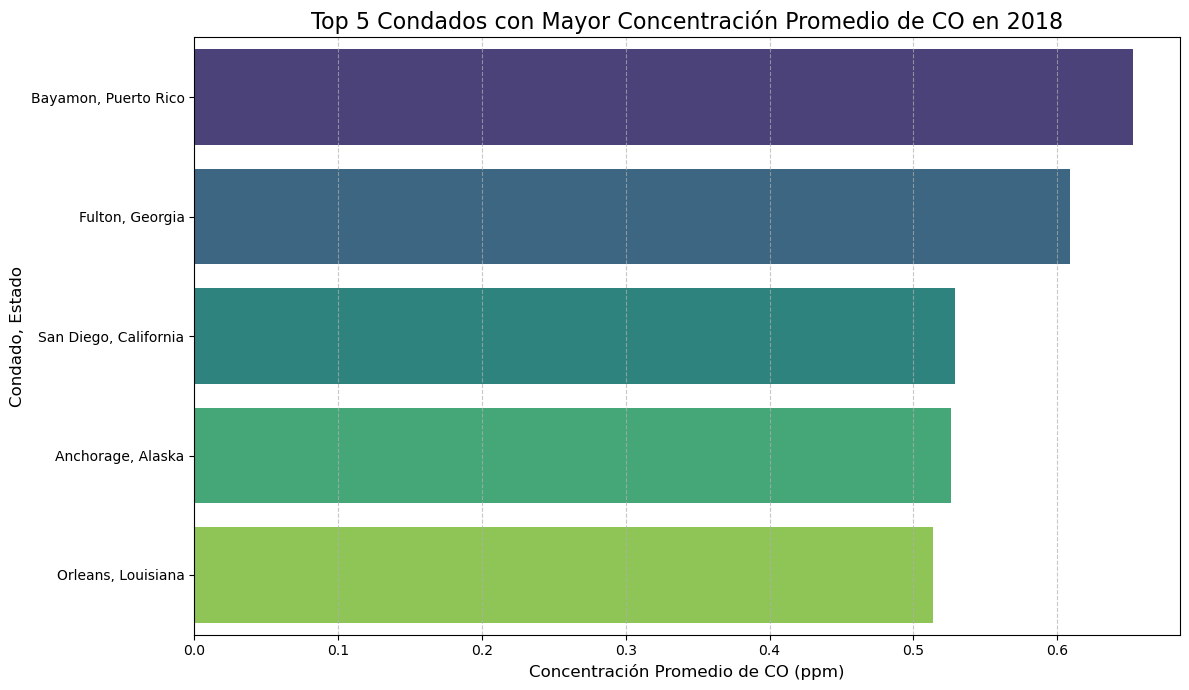


🎉 ¡Gráfico generado exitosamente!


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db_connection import get_engine  # Usamos tu módulo centralizado

# --- 1. Establecer conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Consulta SQL: Top 5 estados/condados con mayor CO en 2018 ---
print("\nEjecutando consulta para Top 5 ubicaciones con mayor CO en 2018...")

query_top_locations = """
SELECT
    l.state_name,
    l.county_name,
    AVG(m.value) AS promedio_valor_medido
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '42101'
  AND YEAR(m.date_local) = 2018
GROUP BY l.state_name, l.county_name
ORDER BY promedio_valor_medido DESC
LIMIT 5;
"""

try:
    df_top_locations = pd.read_sql(query_top_locations, con=engine)
    print("✅ Datos cargados exitosamente:")
    print(df_top_locations)
except Exception as e:
    print(f"❌ Error al ejecutar la consulta: {e}")
    exit()

# --- 3. Visualización ---
print("\nGenerando gráfico de barras...")

plt.figure(figsize=(12, 7))
sns.barplot(
    x='promedio_valor_medido',
    y=df_top_locations['county_name'] + ', ' + df_top_locations['state_name'],
    data=df_top_locations,
    palette='viridis'
)
plt.title('Top 5 Condados con Mayor Concentración Promedio de CO en 2018', fontsize=16)
plt.xlabel('Concentración Promedio de CO (ppm)', fontsize=12)
plt.ylabel('Condado, Estado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar imagen
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
nombre_imagen = f"{carpeta_exportados}/Top 5 Condados con Mayor Concentración Promedio de CO en 2018.png"
plt.savefig(nombre_imagen, dpi=300)
print(f"🖼 Imagen guardada como {nombre_imagen}")

# Guardar CSV antes de mostrar el gráfico
df_top_locations.to_csv("top_5_co_2018.csv", index=False)
print("📁 CSV guardado como 'top_5_co_2018.csv'")

plt.show()
print("\n🎉 ¡Gráfico generado exitosamente!")


## **✅ 1. Top 5 Condados con Mayor Concentración de NO₂ en 2018**

📁 CSV guardado como 'top_5_no2_2018.csv'


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\338754600.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada como 'Top 5 Condados con Mayor Concentración NO2 en 2018.png'


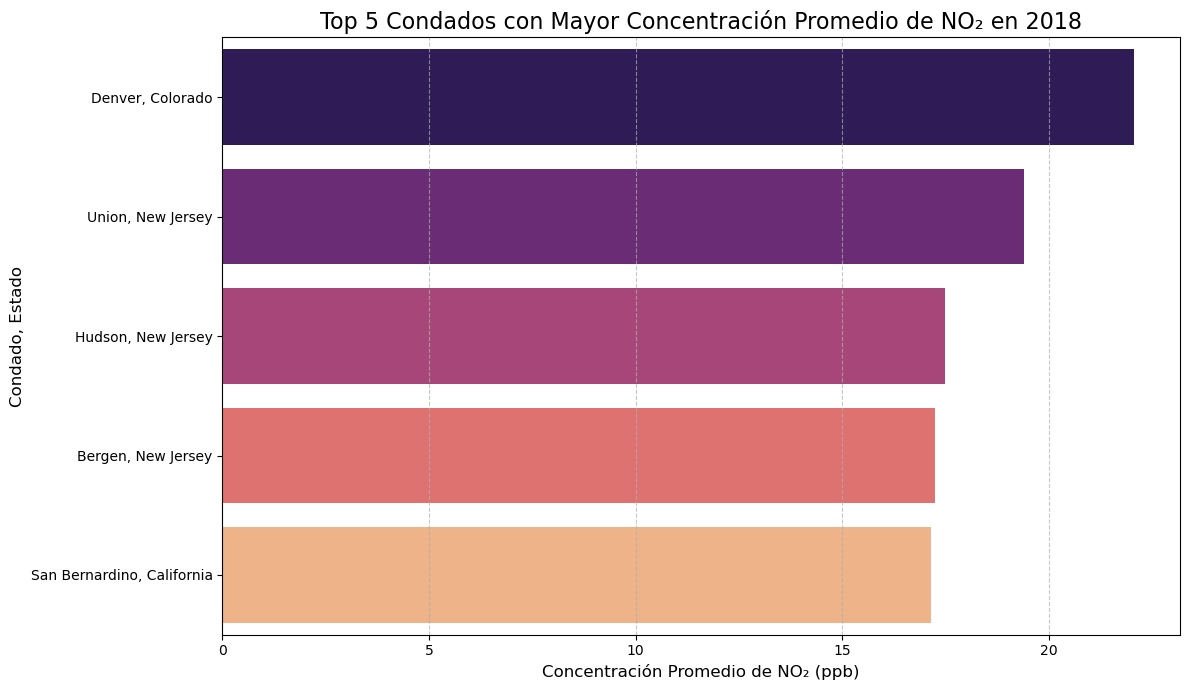

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db_connection import get_engine

engine = get_engine()

parameter_code = '42602'
nombre_contaminante = 'NO2'
unidad = 'ppb'

query = f"""
SELECT
    l.state_name,
    l.county_name,
    AVG(m.value) AS promedio_valor_medido
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) = 2018
GROUP BY l.state_name, l.county_name
ORDER BY promedio_valor_medido DESC
LIMIT 5;
"""

df = pd.read_sql(query, con=engine)
df.to_csv("top_5_no2_2018.csv", index=False)
print("📁 CSV guardado como 'top_5_no2_2018.csv'")

plt.figure(figsize=(12, 7))
sns.barplot(
    x='promedio_valor_medido',
    y=df['county_name'] + ', ' + df['state_name'],
    data=df,
    palette='magma'
)
plt.title("Top 5 Condados con Mayor Concentración Promedio de NO₂ en 2018", fontsize=16)
plt.xlabel(f"Concentración Promedio de NO₂ ({unidad})", fontsize=12)
plt.ylabel("Condado, Estado", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

os.makedirs("exportados", exist_ok=True)
plt.savefig("exportados/Top 5 Condados con Mayor Concentración NO2 en 2018.png", dpi=300)
print("🖼 Imagen guardada como 'Top 5 Condados con Mayor Concentración NO2 en 2018.png'")
plt.show()


## **✅ 2. Top 5 Condados con Mayor Concentración de SO₂ en 2018**

📁 CSV guardado como 'top_5_so2_2018.csv'


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\3152311088.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada como 'Top 5 Condados con Mayor Concentración SO2 en 2018.png'


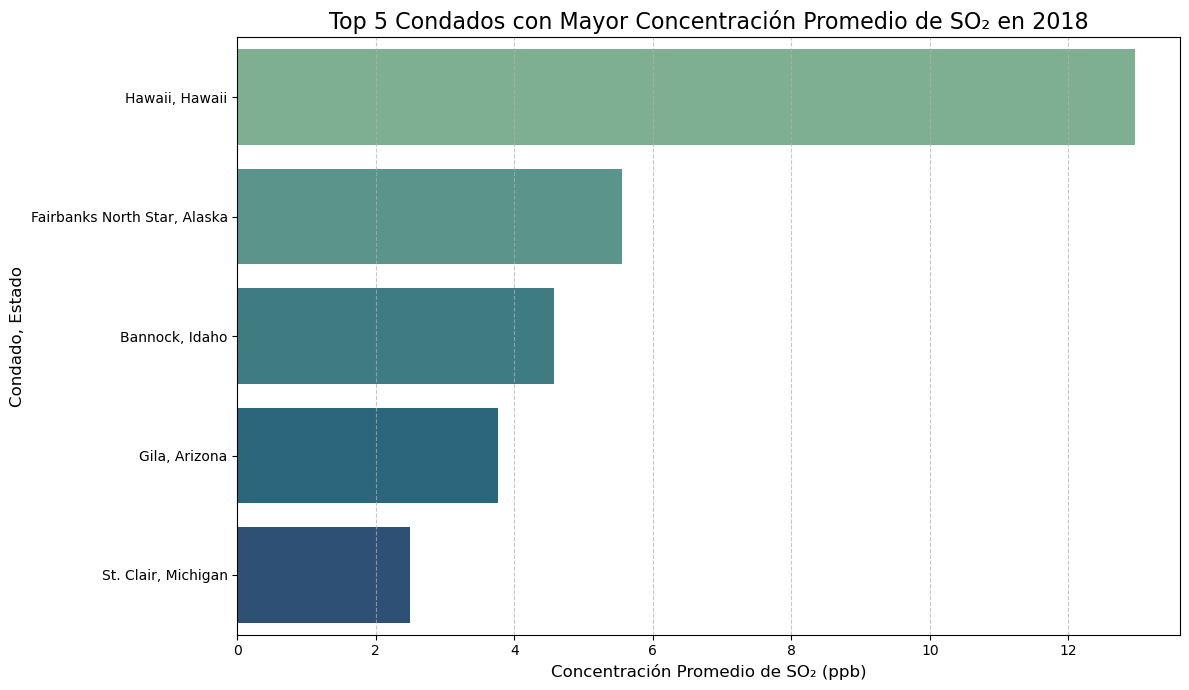

In [23]:
parameter_code = '42401'
nombre_contaminante = 'SO2'
unidad = 'ppb'

query = f"""
SELECT
    l.state_name,
    l.county_name,
    AVG(m.value) AS promedio_valor_medido
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) = 2018
GROUP BY l.state_name, l.county_name
ORDER BY promedio_valor_medido DESC
LIMIT 5;
"""

df = pd.read_sql(query, con=engine)
df.to_csv("top_5_so2_2018.csv", index=False)
print("📁 CSV guardado como 'top_5_so2_2018.csv'")

plt.figure(figsize=(12, 7))
sns.barplot(
    x='promedio_valor_medido',
    y=df['county_name'] + ', ' + df['state_name'],
    data=df,
    palette='crest'
)
plt.title("Top 5 Condados con Mayor Concentración Promedio de SO₂ en 2018", fontsize=16)
plt.xlabel(f"Concentración Promedio de SO₂ ({unidad})", fontsize=12)
plt.ylabel("Condado, Estado", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

os.makedirs("exportados", exist_ok=True)
plt.savefig("exportados/Top 5 Condados con Mayor Concentración SO2 en 2018.png", dpi=300)
print("🖼 Imagen guardada como 'Top 5 Condados con Mayor Concentración SO2 en 2018.png'")
plt.show()


## **✅ 3. Top 5 Condados con Mayor Concentración de O₃ en 2018**

📁 CSV guardado como 'top_5_o3_2018.csv'


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_23268\323099323.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼 Imagen guardada como 'Top 5 Condados con Mayor Concentración O3 en 2018.png'


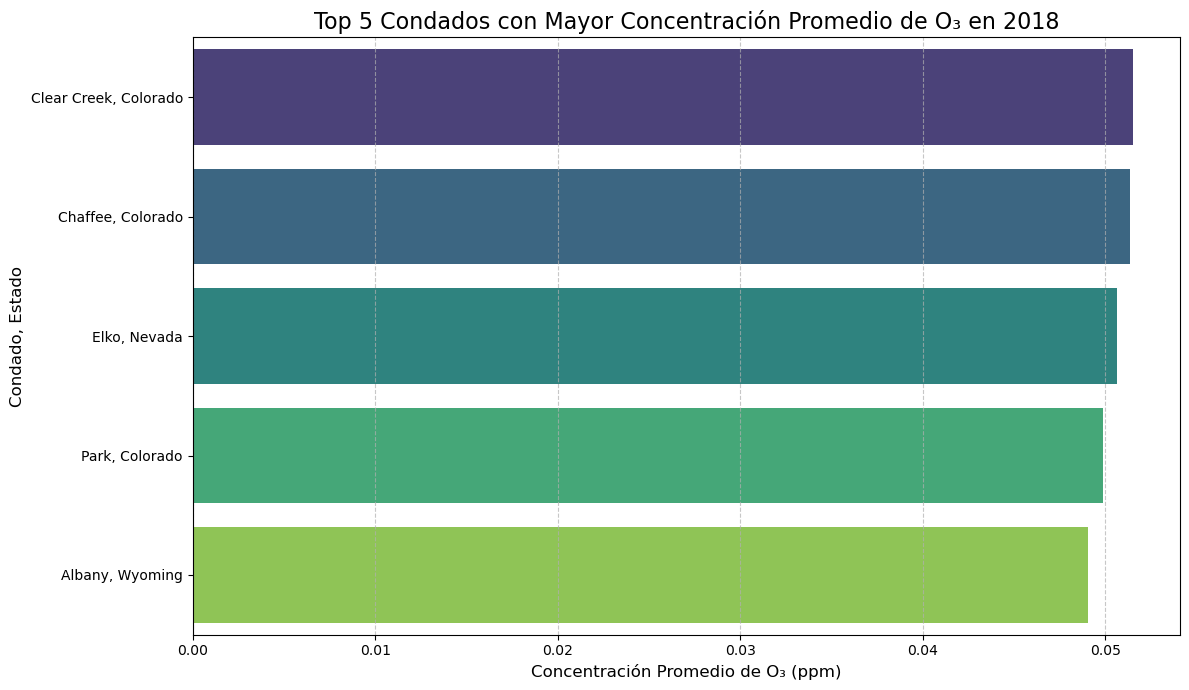

In [24]:
parameter_code = '44201'
nombre_contaminante = 'O3'
unidad = 'ppm'

query = f"""
SELECT
    l.state_name,
    l.county_name,
    AVG(m.value) AS promedio_valor_medido
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) = 2018
GROUP BY l.state_name, l.county_name
ORDER BY promedio_valor_medido DESC
LIMIT 5;
"""

df = pd.read_sql(query, con=engine)
df.to_csv("top_5_o3_2018.csv", index=False)
print("📁 CSV guardado como 'top_5_o3_2018.csv'")

plt.figure(figsize=(12, 7))
sns.barplot(
    x='promedio_valor_medido',
    y=df['county_name'] + ', ' + df['state_name'],
    data=df,
    palette='viridis'
)
plt.title("Top 5 Condados con Mayor Concentración Promedio de O₃ en 2018", fontsize=16)
plt.xlabel(f"Concentración Promedio de O₃ ({unidad})", fontsize=12)
plt.ylabel("Condado, Estado", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

os.makedirs("exportados", exist_ok=True)
plt.savefig("exportados/Top 5 Condados con Mayor Concentración O3 en 2018.png", dpi=300)
print("🖼 Imagen guardada como 'Top 5 Condados con Mayor Concentración O3 en 2018.png'")
plt.show()


Estableciendo conexión a la base de datos...
✅ Conexión establecida.

Ejecutando consulta para tendencia anual de NO2 (2015–2024)...
✅ Consulta exitosa. Vista previa:
   anio  promedio_anual_valor
0  2015             10.241055
1  2016             10.139378
2  2017             10.143455
3  2018              9.857972
4  2019              9.635688
5  2020              9.241322
6  2021              9.384561
7  2022              9.500672
8  2023              9.060084
9  2024              8.676567
📁 CSV guardado como: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\tendencia_anual_NO2.csv

Generando gráfico de tendencia anual de NO2...
🖼 Imagen guardada como exportados/tendencia_anual_NO2.png


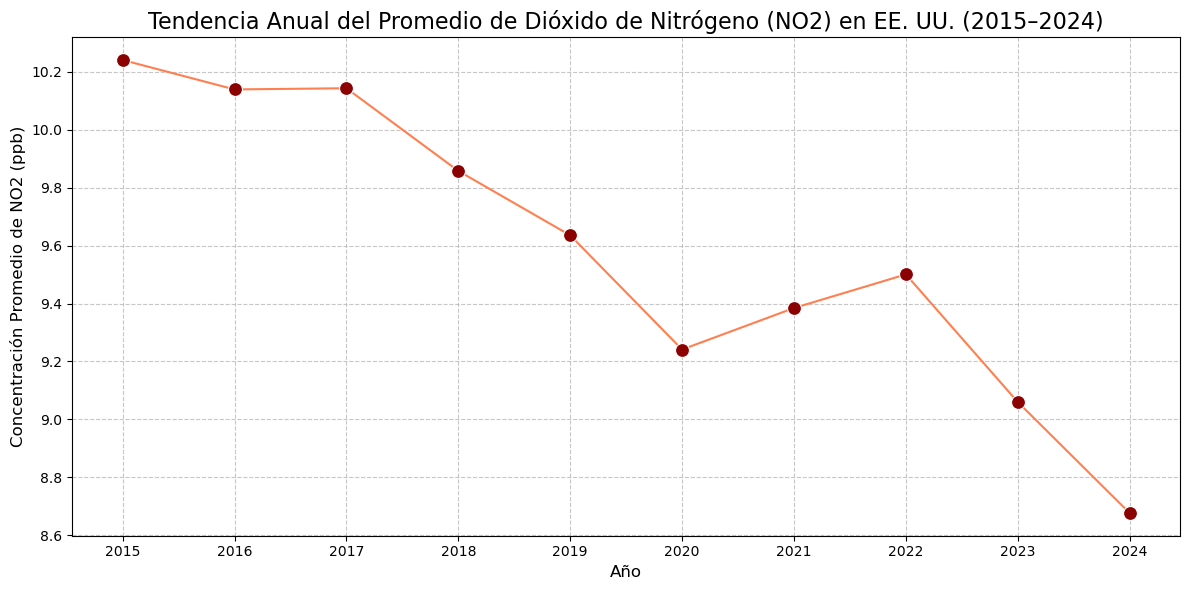


🎉 ¡Tendencia anual de NO2 generada y CSV exportado correctamente!


In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db_connection import get_engine  # Importar tu módulo de conexión centralizado

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión establecida.")
except Exception as e:
    print(f"❌ Error al conectar con la base de datos: {e}")
    exit()

# --- 2. Consulta SQL: Tendencia anual promedio de NO2 (2015–2024) ---
print("\nEjecutando consulta para tendencia anual de NO2 (2015–2024)...")

query_no2_anual_trend = """
SELECT
    YEAR(m.date_local) AS anio,
    AVG(m.value) AS promedio_anual_valor
FROM measurement m
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '42602'
  AND YEAR(m.date_local) BETWEEN 2015 AND 2024
GROUP BY anio
ORDER BY anio;
"""

try:
    df_no2_anual = pd.read_sql(query_no2_anual_trend, con=engine)
    print("✅ Consulta exitosa. Vista previa:")
    print(df_no2_anual)
except Exception as e:
    print(f"❌ Error al ejecutar la consulta: {e}")
    exit()

# --- 3. Guardar CSV (BONUS) ---
nombre_archivo = "tendencia_anual_NO2.csv"
ruta_salida = os.path.join(os.getcwd(), nombre_archivo)

try:
    df_no2_anual.to_csv(ruta_salida, index=False)
    print(f"📁 CSV guardado como: {ruta_salida}")
except Exception as e:
    print(f"❌ Error al guardar CSV: {e}")

# --- 4. Visualización ---
print("\nGenerando gráfico de tendencia anual de NO2...")

plt.figure(figsize=(12, 6))
sns.lineplot(x='anio', y='promedio_anual_valor', data=df_no2_anual, marker='o', color='coral')
sns.scatterplot(x='anio', y='promedio_anual_valor', data=df_no2_anual, color='darkred', s=100, zorder=5)
plt.title('Tendencia Anual del Promedio de Dióxido de Nitrógeno (NO2) en EE. UU. (2015–2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Concentración Promedio de NO2 (ppb)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_no2_anual['anio'].astype(int))
plt.tight_layout()

# Guardar imagen
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
nombre_imagen = f"{carpeta_exportados}/tendencia_anual_NO2.png"
plt.savefig(nombre_imagen, dpi=300)
print(f"🖼 Imagen guardada como {nombre_imagen}")

plt.show()

print("\n🎉 ¡Tendencia anual de NO2 generada y CSV exportado correctamente!")


Estableciendo conexión a la base de datos...
✅ Conexión establecida.
✅ Consulta ejecutada con éxito. Vista previa:
   anio  promedio_anual_valor
0  2015              0.332350
1  2016              0.327349
2  2017              0.324848
3  2018              0.315937
4  2019              0.298481
5  2020              0.316382
6  2021              0.307890
7  2022              0.285030
8  2023              0.290823
9  2024              0.273825
📁 CSV guardado en: C:\Users\mjcd1\Desktop\CURSOS\Python Unicorn\Proyecto Integrador Final Calidad del Aire USA\Air Quality Data Project\tendencia_anual_CO.csv
🖼 Imagen guardada como exportados/tendencia_anual_CO.png


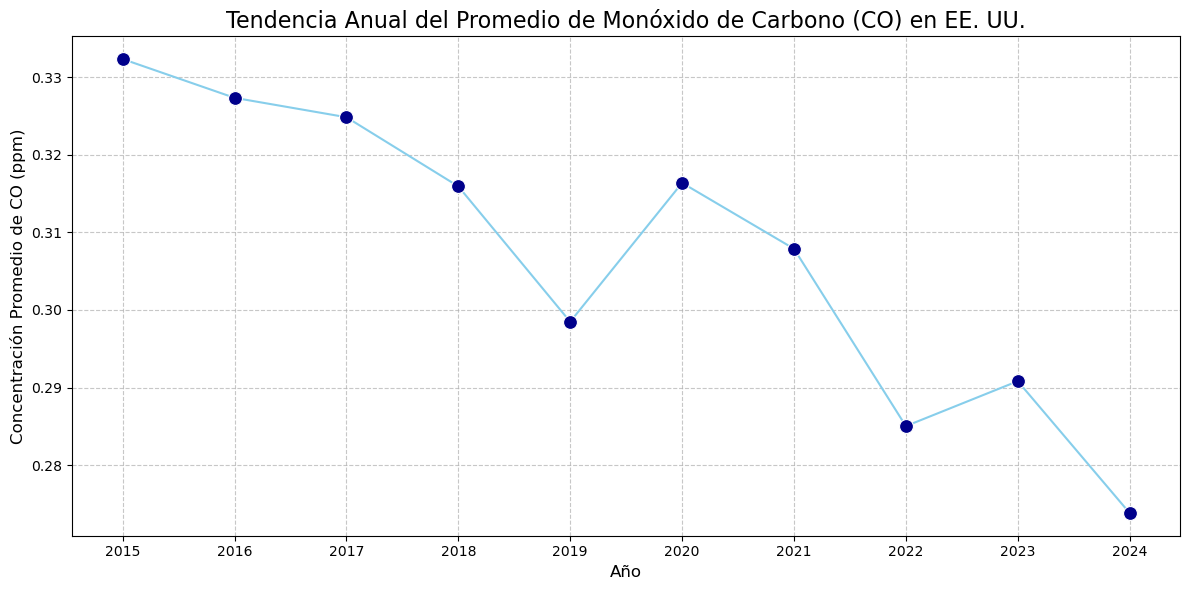


🎉 Proceso completado: conexión, consulta, CSV y visualización.


In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db_connection import get_engine  # Usamos tu módulo de conexión centralizado

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión establecida.")
except Exception as e:
    print(f"❌ Error al conectar con la base de datos: {e}")
    exit()

# --- 2. Consulta: Tendencia anual promedio de CO ---
parameter_code = '42101'  # CO
nombre_contaminante = 'CO'

query = f"""
SELECT
    YEAR(m.date_local) AS anio,
    AVG(m.value) AS promedio_anual_valor
FROM measurement m
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
GROUP BY anio
ORDER BY anio;
"""

try:
    df = pd.read_sql(query, con=engine)
    print("✅ Consulta ejecutada con éxito. Vista previa:")
    print(df)
except Exception as e:
    print(f"❌ ERROR al ejecutar la consulta SQL: {e}")
    exit()

# --- 3. Guardar CSV ---
nombre_archivo = f"tendencia_anual_{nombre_contaminante}.csv"
ruta_salida = os.path.join(os.getcwd(), nombre_archivo)

try:
    df.to_csv(ruta_salida, index=False)
    print(f"📁 CSV guardado en: {ruta_salida}")
except Exception as e:
    print(f"❌ ERROR al guardar CSV: {e}")

# --- 4. Visualización ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='anio', y='promedio_anual_valor', data=df, marker='o', color='skyblue')
sns.scatterplot(x='anio', y='promedio_anual_valor', data=df, color='darkblue', s=100, zorder=5)
plt.title('Tendencia Anual del Promedio de Monóxido de Carbono (CO) en EE. UU.', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Concentración Promedio de CO (ppm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df['anio'].astype(int))
plt.tight_layout()

# Guardar imagen
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
nombre_imagen = f"{carpeta_exportados}/tendencia_anual_CO.png"
plt.savefig(nombre_imagen, dpi=300)
print(f"🖼 Imagen guardada como {nombre_imagen}")

plt.show()

print("\n🎉 Proceso completado: conexión, consulta, CSV y visualización.")


## **✅ Script: Tendencia Anual de SO₂ (Dióxido de Azufre)**

Conectando a la base de datos para SO₂...
✅ Conexión establecida.
✅ Datos de SO₂ obtenidos:
   anio  promedio_anual_valor
0  2015              1.305527
1  2016              1.242712
2  2017              1.182116
3  2018              1.105378
4  2019              0.715502
5  2020              0.670354
6  2021              0.727666
7  2022              0.659128
8  2023              0.601414
9  2024              0.498170
📁 CSV guardado como tendencia_anual_SO2.csv
🖼 Imagen guardada como exportados/tendencia_anual_SO2.png


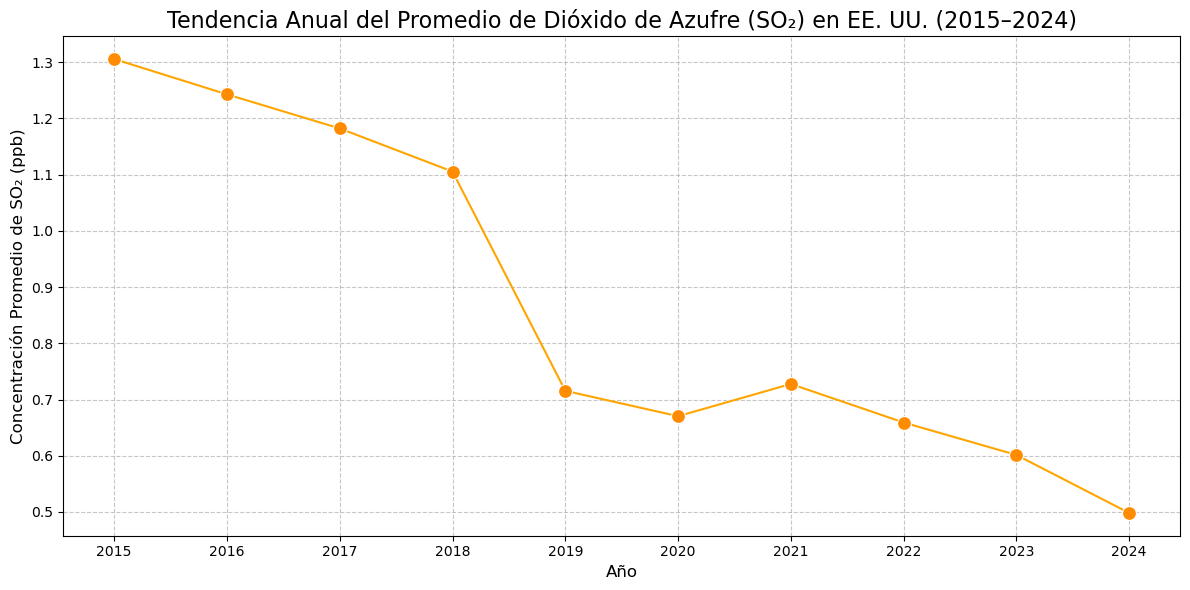


🎉 ¡Visualización de SO₂ generada correctamente!


In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db_connection import get_engine

# --- 1. Conexión ---
print("Conectando a la base de datos para SO₂...")
try:
    engine = get_engine()
    print("✅ Conexión establecida.")
except Exception as e:
    print(f"❌ Error de conexión: {e}")
    exit()

# --- 2. Consulta SQL ---
parameter_code = '42401'  # SO2
nombre_contaminante = 'SO2'

query = f"""
SELECT
    YEAR(m.date_local) AS anio,
    AVG(m.value) AS promedio_anual_valor
FROM measurement m
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) BETWEEN 2015 AND 2024
GROUP BY anio
ORDER BY anio;
"""

try:
    df_so2 = pd.read_sql(query, con=engine)
    print("✅ Datos de SO₂ obtenidos:")
    print(df_so2)
except Exception as e:
    print(f"❌ Error en la consulta: {e}")
    exit()

# --- 3. Guardar CSV ---
nombre_archivo = f"tendencia_anual_{nombre_contaminante}.csv"
df_so2.to_csv(nombre_archivo, index=False)
print(f"📁 CSV guardado como {nombre_archivo}")

# --- 4. Visualización ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='anio', y='promedio_anual_valor', data=df_so2, marker='o', color='orange')
sns.scatterplot(x='anio', y='promedio_anual_valor', data=df_so2, color='darkorange', s=100, zorder=5)
plt.title('Tendencia Anual del Promedio de Dióxido de Azufre (SO₂) en EE. UU. (2015–2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Concentración Promedio de SO₂ (ppb)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_so2['anio'].astype(int))
plt.tight_layout()

# Guardar imagen
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
nombre_imagen = f"{carpeta_exportados}/tendencia_anual_SO2.png"
plt.savefig(nombre_imagen, dpi=300)
print(f"🖼 Imagen guardada como {nombre_imagen}")

plt.show()

print("\n🎉 ¡Visualización de SO₂ generada correctamente!")


## **✅ Script: Tendencia Anual de Ozono (O₃)**

Conectando a la base de datos para O₃...
✅ Conexión establecida.
✅ Datos de O₃ obtenidos:
   anio  promedio_anual_valor
0  2015              0.030717
1  2016              0.031249
2  2017              0.031941
3  2018              0.031524
4  2019              0.031574
5  2020              0.031007
6  2021              0.031800
7  2022              0.031866
8  2023              0.032637
9  2024              0.034093
📁 CSV guardado como tendencia_anual_O3.csv
🖼 Imagen guardada como exportados/tendencia_anual_O3.png


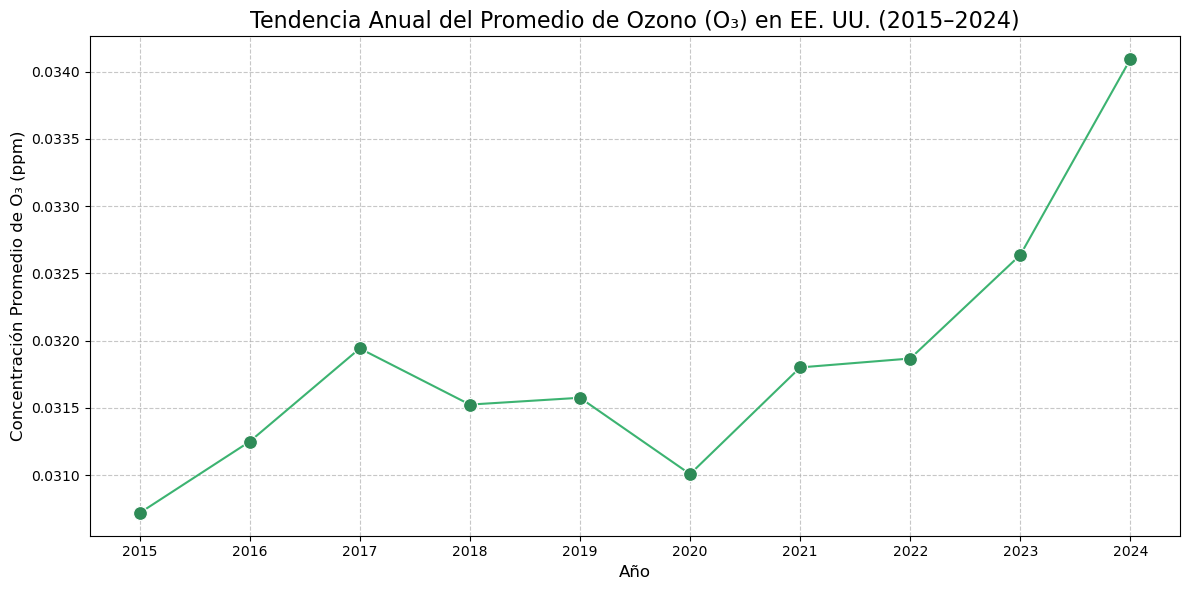


🎉 ¡Visualización de O₃ generada correctamente!


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db_connection import get_engine

# --- 1. Conexión ---
print("Conectando a la base de datos para O₃...")
try:
    engine = get_engine()
    print("✅ Conexión establecida.")
except Exception as e:
    print(f"❌ Error de conexión: {e}")
    exit()

# --- 2. Consulta SQL ---
parameter_code = '44201'  # O3
nombre_contaminante = 'O3'

query = f"""
SELECT
    YEAR(m.date_local) AS anio,
    AVG(m.value) AS promedio_anual_valor
FROM measurement m
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) BETWEEN 2015 AND 2024
GROUP BY anio
ORDER BY anio;
"""

try:
    df_o3 = pd.read_sql(query, con=engine)
    print("✅ Datos de O₃ obtenidos:")
    print(df_o3)
except Exception as e:
    print(f"❌ Error en la consulta: {e}")
    exit()

# --- 3. Guardar CSV ---
nombre_archivo = f"tendencia_anual_{nombre_contaminante}.csv"
df_o3.to_csv(nombre_archivo, index=False)
print(f"📁 CSV guardado como {nombre_archivo}")

# --- 4. Visualización ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='anio', y='promedio_anual_valor', data=df_o3, marker='o', color='mediumseagreen')
sns.scatterplot(x='anio', y='promedio_anual_valor', data=df_o3, color='seagreen', s=100, zorder=5)
plt.title('Tendencia Anual del Promedio de Ozono (O₃) en EE. UU. (2015–2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Concentración Promedio de O₃ (ppm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_o3['anio'].astype(int))
plt.tight_layout()

# Guardar imagen
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
nombre_imagen = f"{carpeta_exportados}/tendencia_anual_O3.png"
plt.savefig(nombre_imagen, dpi=300)
print(f"🖼 Imagen guardada como {nombre_imagen}")

plt.show()

print("\n🎉 ¡Visualización de O₃ generada correctamente!")


In [1]:
import os
import pandas as pd
from db_connection import get_engine

# 1. Conexión
engine = get_engine()

# 2. Consulta
query = """
SELECT
    p.parameter_code,
    p.parameter_name,
    l.state_name,
    YEAR(m.date_local) AS anio,
    AVG(m.value) AS promedio_anual_estado
FROM measurement m
JOIN parameter p ON m.parameter_id = p.parameter_id
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
WHERE p.parameter_code IN ('42101', '42602', '44201', '42401')
  AND YEAR(m.date_local) BETWEEN 2015 AND 2024
GROUP BY p.parameter_code, p.parameter_name, l.state_name, anio
ORDER BY p.parameter_code, l.state_name, anio;
"""

# 3. Ejecutar y guardar
df = pd.read_sql(query, con=engine)
df.to_csv("promedios_anuales_estatales.csv", index=False)
print("✅ Consulta ejecutada y CSV exportado como 'promedios_anuales_estatales.csv'")
print(df.head())


✅ Consulta ejecutada y CSV exportado como 'promedios_anuales_estatales.csv'
   parameter_code   parameter_name state_name  anio  promedio_anual_estado
0           42101  Carbon monoxide    Alabama  2015               0.382038
1           42101  Carbon monoxide    Alabama  2016               0.337608
2           42101  Carbon monoxide    Alabama  2017               0.302204
3           42101  Carbon monoxide    Alabama  2018               0.255708
4           42101  Carbon monoxide    Alabama  2019               0.286627


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   parameter_code         2034 non-null   int64  
 1   parameter_name         2034 non-null   object 
 2   state_name             2034 non-null   object 
 3   anio                   2034 non-null   int64  
 4   promedio_anual_estado  2034 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.6+ KB


In [3]:
df

parameter_code   parameter_name state_name  anio  promedio_anual_estado
0              42101  Carbon monoxide    Alabama  2015               0.382038
1              42101  Carbon monoxide    Alabama  2016               0.337608
2              42101  Carbon monoxide    Alabama  2017               0.302204
3              42101  Carbon monoxide    Alabama  2018               0.255708
4              42101  Carbon monoxide    Alabama  2019               0.286627
...              ...              ...        ...   ...                    ...
2029           44201            Ozone    Wyoming  2020               0.038730
2030           44201            Ozone    Wyoming  2021               0.039853
2031           44201            Ozone    Wyoming  2022               0.038555
2032           44201            Ozone    Wyoming  2023               0.039731
2033           44201            Ozone    Wyoming  2024               0.040383

[2034 rows x 5 columns]

🖼 Imagen guardada como exportados/tendencia_anual_edo_calif.png


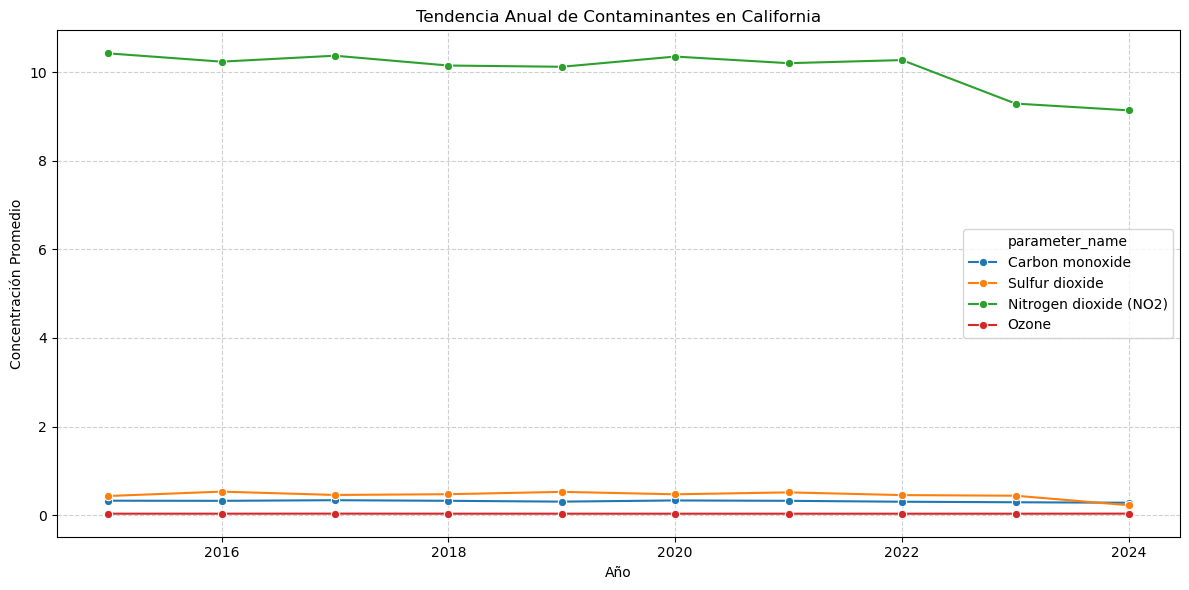

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

estado = "California"  # Puedes cambiar el estado aquí

df_estado = df[df["state_name"] == estado]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_estado, x="anio", y="promedio_anual_estado", hue="parameter_name", marker="o")
plt.title(f"Tendencia Anual de Contaminantes en {estado}")
plt.ylabel("Concentración Promedio")
plt.xlabel("Año")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Guardar imagen
carpeta_exportados = "exportados"
os.makedirs(carpeta_exportados, exist_ok=True)
nombre_imagen = f"{carpeta_exportados}/tendencia_anual_edo_calif.png"
plt.savefig(nombre_imagen, dpi=300)
print(f"🖼 Imagen guardada como {nombre_imagen}")

plt.show()


Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 10 estados con mayor promedio de NO2 en 2024...
✅ Consulta ejecutada correctamente:
     state_name  promedio_estatal
0       Georgia         14.913116
1    New Jersey         13.703563
2      Illinois         13.258858
3       Arizona         12.407154
4        Nevada         11.393861
5      Michigan         11.202306
6    Washington         11.057753
7      New York         10.885678
8  Pennsylvania         10.036488
9      Missouri          9.901604
📁 CSV guardado como 'top_10_estados_no2_2024.csv'


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_16176\2936787789.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼️ Imagen guardada como 'exportados\Top 10 Estados con Mayor Promedio de NO2 en 2024.png'


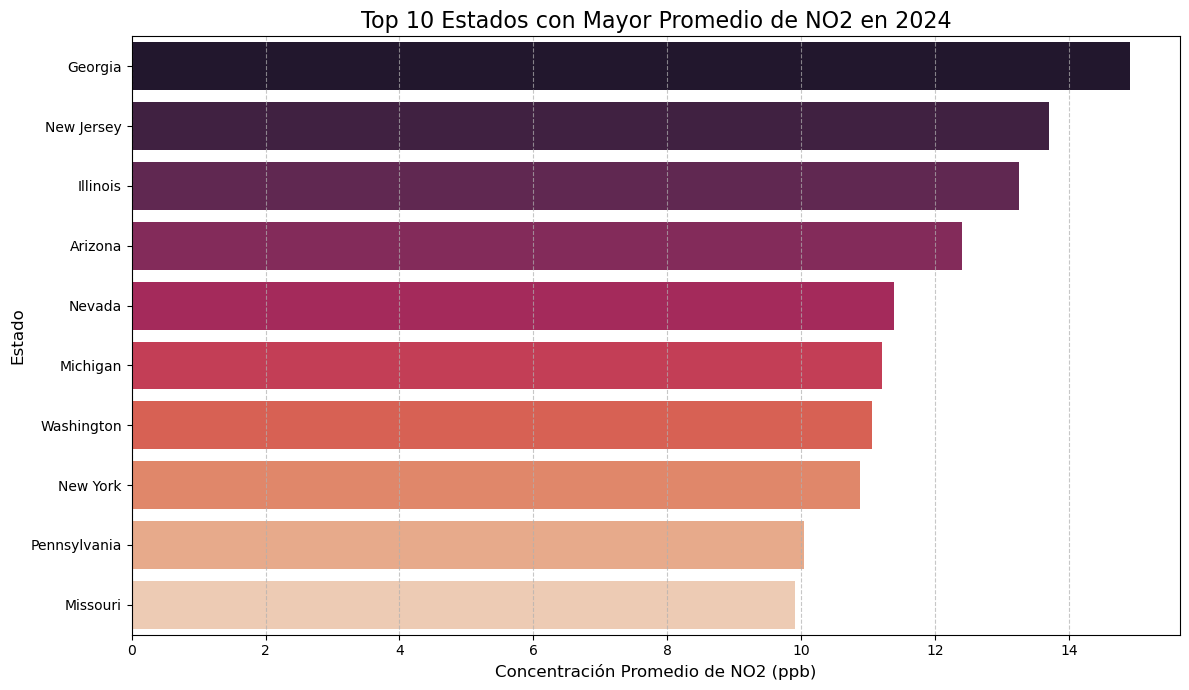

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from db_connection import get_engine  # Usa tu módulo personalizado

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Parámetros para la consulta ---
parameter_code = '42602'  # NO2
parameter_name = 'NO2'
anio = 2024

# --- 3. Consulta SQL ---
query = f"""
SELECT
    l.state_name,
    AVG(m.value) AS promedio_estatal
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) = {anio}
GROUP BY l.state_name
ORDER BY promedio_estatal DESC
LIMIT 10;
"""

print(f"\nEjecutando consulta para Top 10 estados con mayor promedio de {parameter_name} en {anio}...")
try:
    df_top_states = pd.read_sql(query, con=engine)
    print("✅ Consulta ejecutada correctamente:")
    print(df_top_states)
except Exception as e:
    print(f"❌ Error en la consulta SQL: {e}")
    exit()

# --- 4. Exportar CSV ---
csv_path = f"top_10_estados_{parameter_name.lower()}_{anio}.csv"
df_top_states.to_csv(csv_path, index=False)
print(f"📁 CSV guardado como '{csv_path}'")

# --- 5. Visualización ---
plt.figure(figsize=(12, 7))
sns.barplot(
    x="promedio_estatal",
    y="state_name",
    data=df_top_states,
    palette="rocket"
)
plt.title(f"Top 10 Estados con Mayor Promedio de {parameter_name.upper()} en {anio}", fontsize=16)
plt.xlabel(f"Concentración Promedio de {parameter_name.upper()} (ppb)", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- 6. Guardar PNG ---
output_path = os.path.join("exportados", f"Top 10 Estados con Mayor Promedio de {parameter_name.upper()} en {anio}.png")
plt.savefig(output_path, dpi=300)
print(f"🖼️ Imagen guardada como '{output_path}'")

plt.show()


Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 10 estados con mayor promedio de CO en 2024...
✅ Consulta ejecutada correctamente:
             state_name  promedio_estatal
0               Georgia          0.429738
1              Michigan          0.370795
2  District Of Columbia          0.350288
3          Pennsylvania          0.348183
4              Oklahoma          0.337380
5                Alaska          0.331027
6               Indiana          0.329966
7               Florida          0.323544
8                Nevada          0.322653
9            New Jersey          0.318812
📁 CSV guardado como 'top_10_estados_co_2024.csv'


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_16176\888782497.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼️ Imagen guardada como 'exportados\Top 10 Estados con Mayor Promedio de CO en 2024.png'


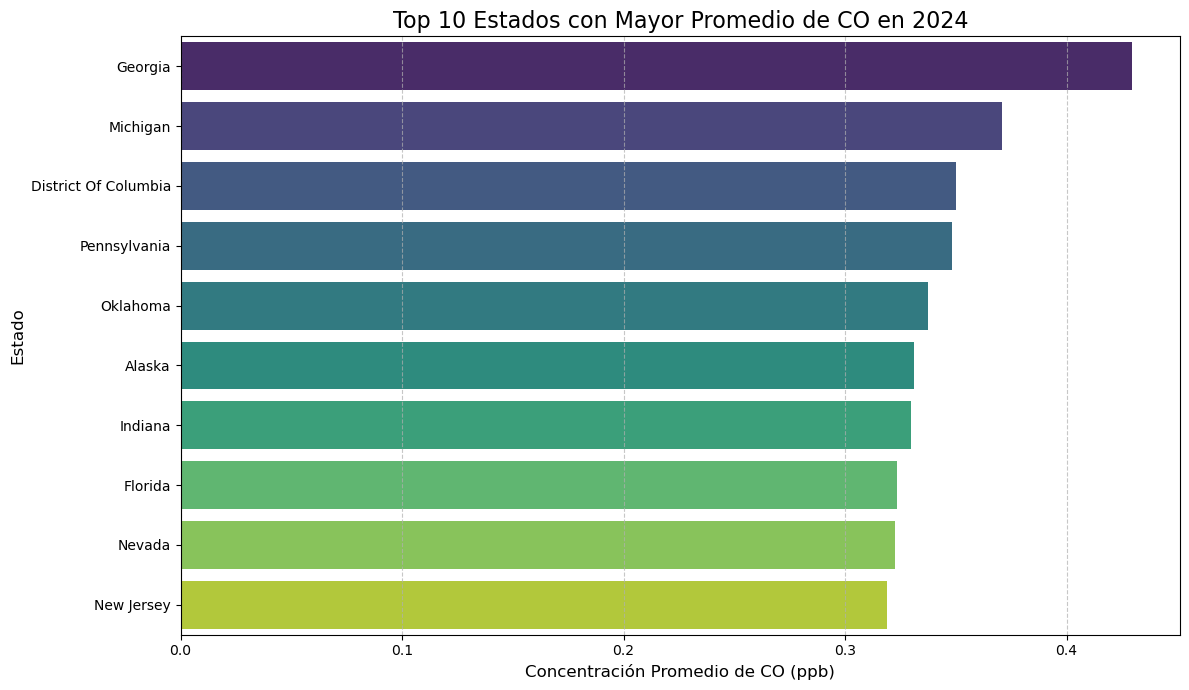

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from db_connection import get_engine  # Usa tu módulo personalizado

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Parámetros para la consulta ---
parameter_code = '42101'  # CO
parameter_name = 'CO'
anio = 2024

# --- 3. Consulta SQL ---
query = f"""
SELECT
    l.state_name,
    AVG(m.value) AS promedio_estatal
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) = {anio}
GROUP BY l.state_name
ORDER BY promedio_estatal DESC
LIMIT 10;
"""

print(f"\nEjecutando consulta para Top 10 estados con mayor promedio de {parameter_name} en {anio}...")
try:
    df_top_states = pd.read_sql(query, con=engine)
    print("✅ Consulta ejecutada correctamente:")
    print(df_top_states)
except Exception as e:
    print(f"❌ Error en la consulta SQL: {e}")
    exit()

# --- 4. Exportar CSV ---
csv_path = f"top_10_estados_{parameter_name.lower()}_{anio}.csv"
df_top_states.to_csv(csv_path, index=False)
print(f"📁 CSV guardado como '{csv_path}'")

# --- 5. Visualización ---
plt.figure(figsize=(12, 7))
sns.barplot(
    x="promedio_estatal",
    y="state_name",
    data=df_top_states,
    palette="viridis"
)
plt.title(f"Top 10 Estados con Mayor Promedio de {parameter_name.upper()} en {anio}", fontsize=16)
plt.xlabel(f"Concentración Promedio de {parameter_name.upper()} (ppb)", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- 6. Guardar PNG ---
output_path = os.path.join("exportados", f"Top 10 Estados con Mayor Promedio de {parameter_name.upper()} en {anio}.png")
plt.savefig(output_path, dpi=300)
print(f"🖼️ Imagen guardada como '{output_path}'")

plt.show()


Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 10 estados con mayor promedio de SO2 en 2024...
✅ Consulta ejecutada correctamente:
      state_name  promedio_estatal
0         Alaska          2.272766
1         Hawaii          1.405278
2        Montana          1.248636
3  West Virginia          1.241995
4   North Dakota          1.193668
5        Georgia          1.086661
6       Michigan          1.031330
7       Kentucky          0.987492
8   Pennsylvania          0.769506
9       Missouri          0.760594
📁 CSV guardado como 'top_10_estados_so2_2024.csv'


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_16176\2590495507.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼️ Imagen guardada como 'exportados\Top 10 Estados con Mayor Promedio de SO2 en 2024.png'


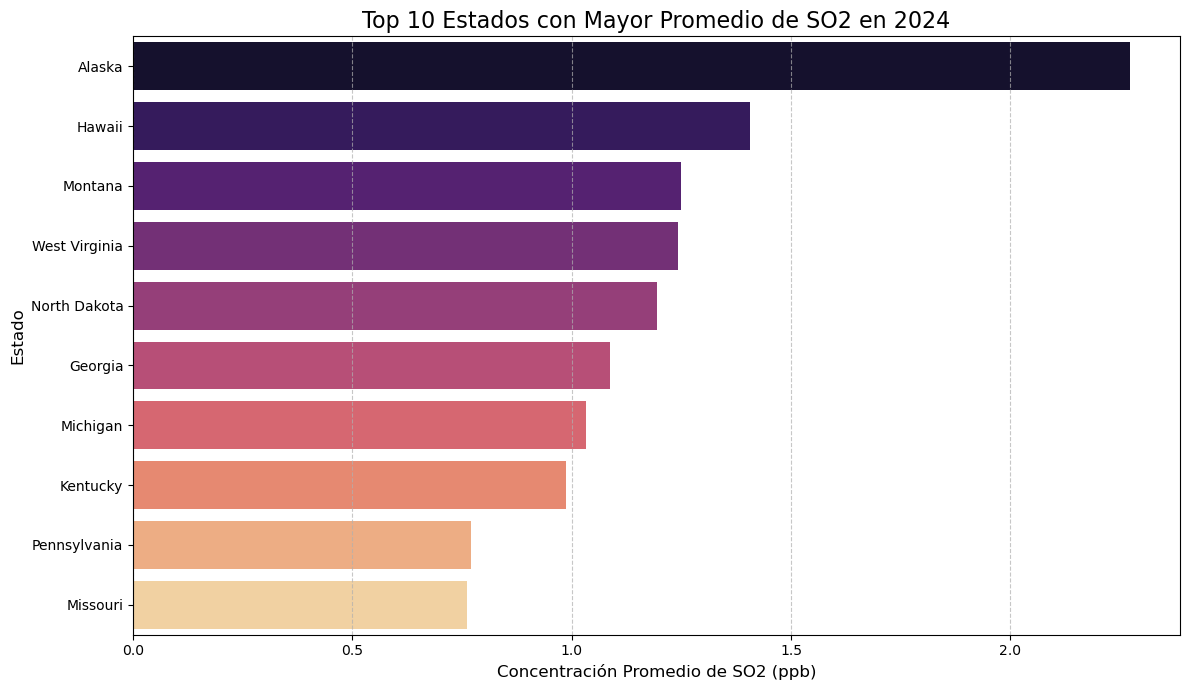

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from db_connection import get_engine  # Usa tu módulo personalizado

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Parámetros para la consulta ---
parameter_code = '42401'  # CO
parameter_name = 'SO2'
anio = 2024

# --- 3. Consulta SQL ---
query = f"""
SELECT
    l.state_name,
    AVG(m.value) AS promedio_estatal
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) = {anio}
GROUP BY l.state_name
ORDER BY promedio_estatal DESC
LIMIT 10;
"""

print(f"\nEjecutando consulta para Top 10 estados con mayor promedio de {parameter_name} en {anio}...")
try:
    df_top_states = pd.read_sql(query, con=engine)
    print("✅ Consulta ejecutada correctamente:")
    print(df_top_states)
except Exception as e:
    print(f"❌ Error en la consulta SQL: {e}")
    exit()

# --- 4. Exportar CSV ---
csv_path = f"top_10_estados_{parameter_name.lower()}_{anio}.csv"
df_top_states.to_csv(csv_path, index=False)
print(f"📁 CSV guardado como '{csv_path}'")

# --- 5. Visualización ---
plt.figure(figsize=(12, 7))
sns.barplot(
    x="promedio_estatal",
    y="state_name",
    data=df_top_states,
    palette="magma"
)
plt.title(f"Top 10 Estados con Mayor Promedio de {parameter_name.upper()} en {anio}", fontsize=16)
plt.xlabel(f"Concentración Promedio de {parameter_name.upper()} (ppb)", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- 6. Guardar PNG ---
output_path = os.path.join("exportados", f"Top 10 Estados con Mayor Promedio de {parameter_name.upper()} en {anio}.png")
plt.savefig(output_path, dpi=300)
print(f"🖼️ Imagen guardada como '{output_path}'")

plt.show()

Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta para Top 10 estados con mayor promedio de O3 en 2024...
✅ Consulta ejecutada correctamente:
     state_name  promedio_estatal
0        Nevada          0.042200
1      Colorado          0.041123
2       Wyoming          0.040383
3          Utah          0.039112
4       Arizona          0.036741
5    New Mexico          0.036509
6  South Dakota          0.036255
7      Oklahoma          0.036197
8     Wisconsin          0.035877
9         Idaho          0.035587
📁 CSV guardado como 'top_10_estados_o3_2024.csv'


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_16176\2451638088.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🖼️ Imagen guardada como 'exportados\Top 10 Estados con Mayor Promedio de O3 en 2024.png'


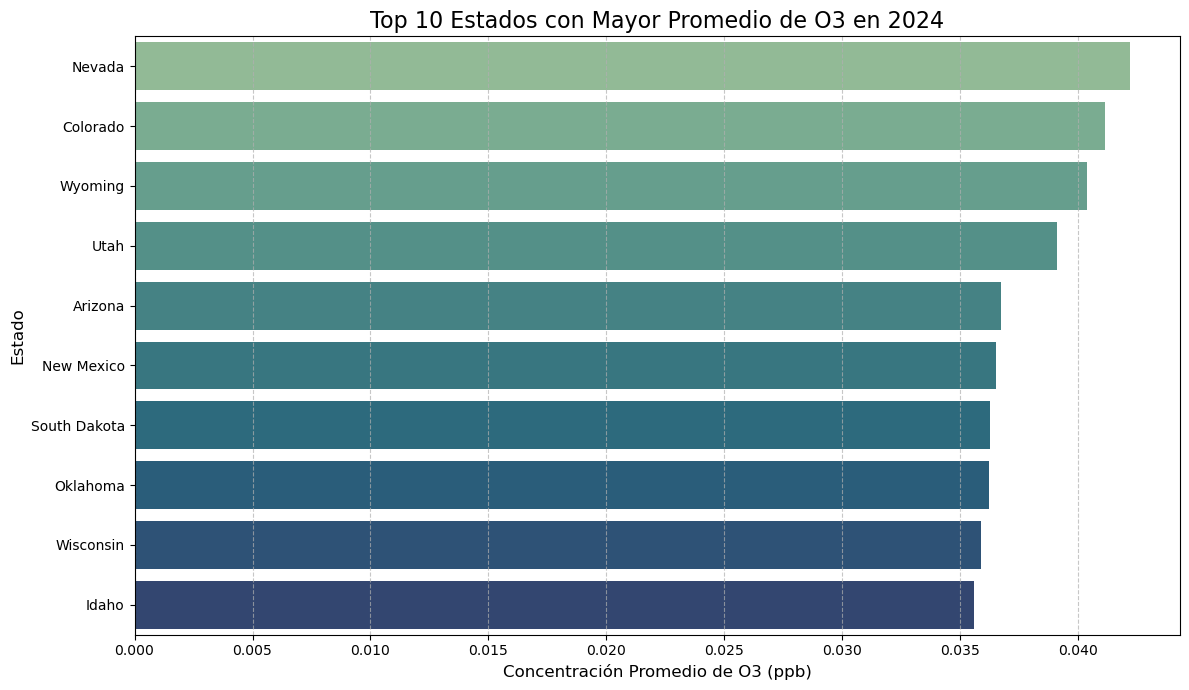

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from db_connection import get_engine  # Usa tu módulo personalizado

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Parámetros para la consulta ---
parameter_code = '44201'  # O3
parameter_name = 'O3'
anio = 2024

# --- 3. Consulta SQL ---
query = f"""
SELECT
    l.state_name,
    AVG(m.value) AS promedio_estatal
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE p.parameter_code = '{parameter_code}'
  AND YEAR(m.date_local) = {anio}
GROUP BY l.state_name
ORDER BY promedio_estatal DESC
LIMIT 10;
"""

print(f"\nEjecutando consulta para Top 10 estados con mayor promedio de {parameter_name} en {anio}...")
try:
    df_top_states = pd.read_sql(query, con=engine)
    print("✅ Consulta ejecutada correctamente:")
    print(df_top_states)
except Exception as e:
    print(f"❌ Error en la consulta SQL: {e}")
    exit()

# --- 4. Exportar CSV ---
csv_path = f"top_10_estados_{parameter_name.lower()}_{anio}.csv"
df_top_states.to_csv(csv_path, index=False)
print(f"📁 CSV guardado como '{csv_path}'")

# --- 5. Visualización ---
plt.figure(figsize=(12, 7))
sns.barplot(
    x="promedio_estatal",
    y="state_name",
    data=df_top_states,
    palette="crest"
)
plt.title(f"Top 10 Estados con Mayor Promedio de {parameter_name.upper()} en {anio}", fontsize=16)
plt.xlabel(f"Concentración Promedio de {parameter_name.upper()} (ppb)", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- 6. Guardar PNG ---
output_path = os.path.join("exportados", f"Top 10 Estados con Mayor Promedio de {parameter_name.upper()} en {anio}.png")
plt.savefig(output_path, dpi=300)
print(f"🖼️ Imagen guardada como '{output_path}'")

plt.show()

Estableciendo conexión a la base de datos...
✅ Conexión exitosa.
✅ Consulta ejecutada y datos cargados.


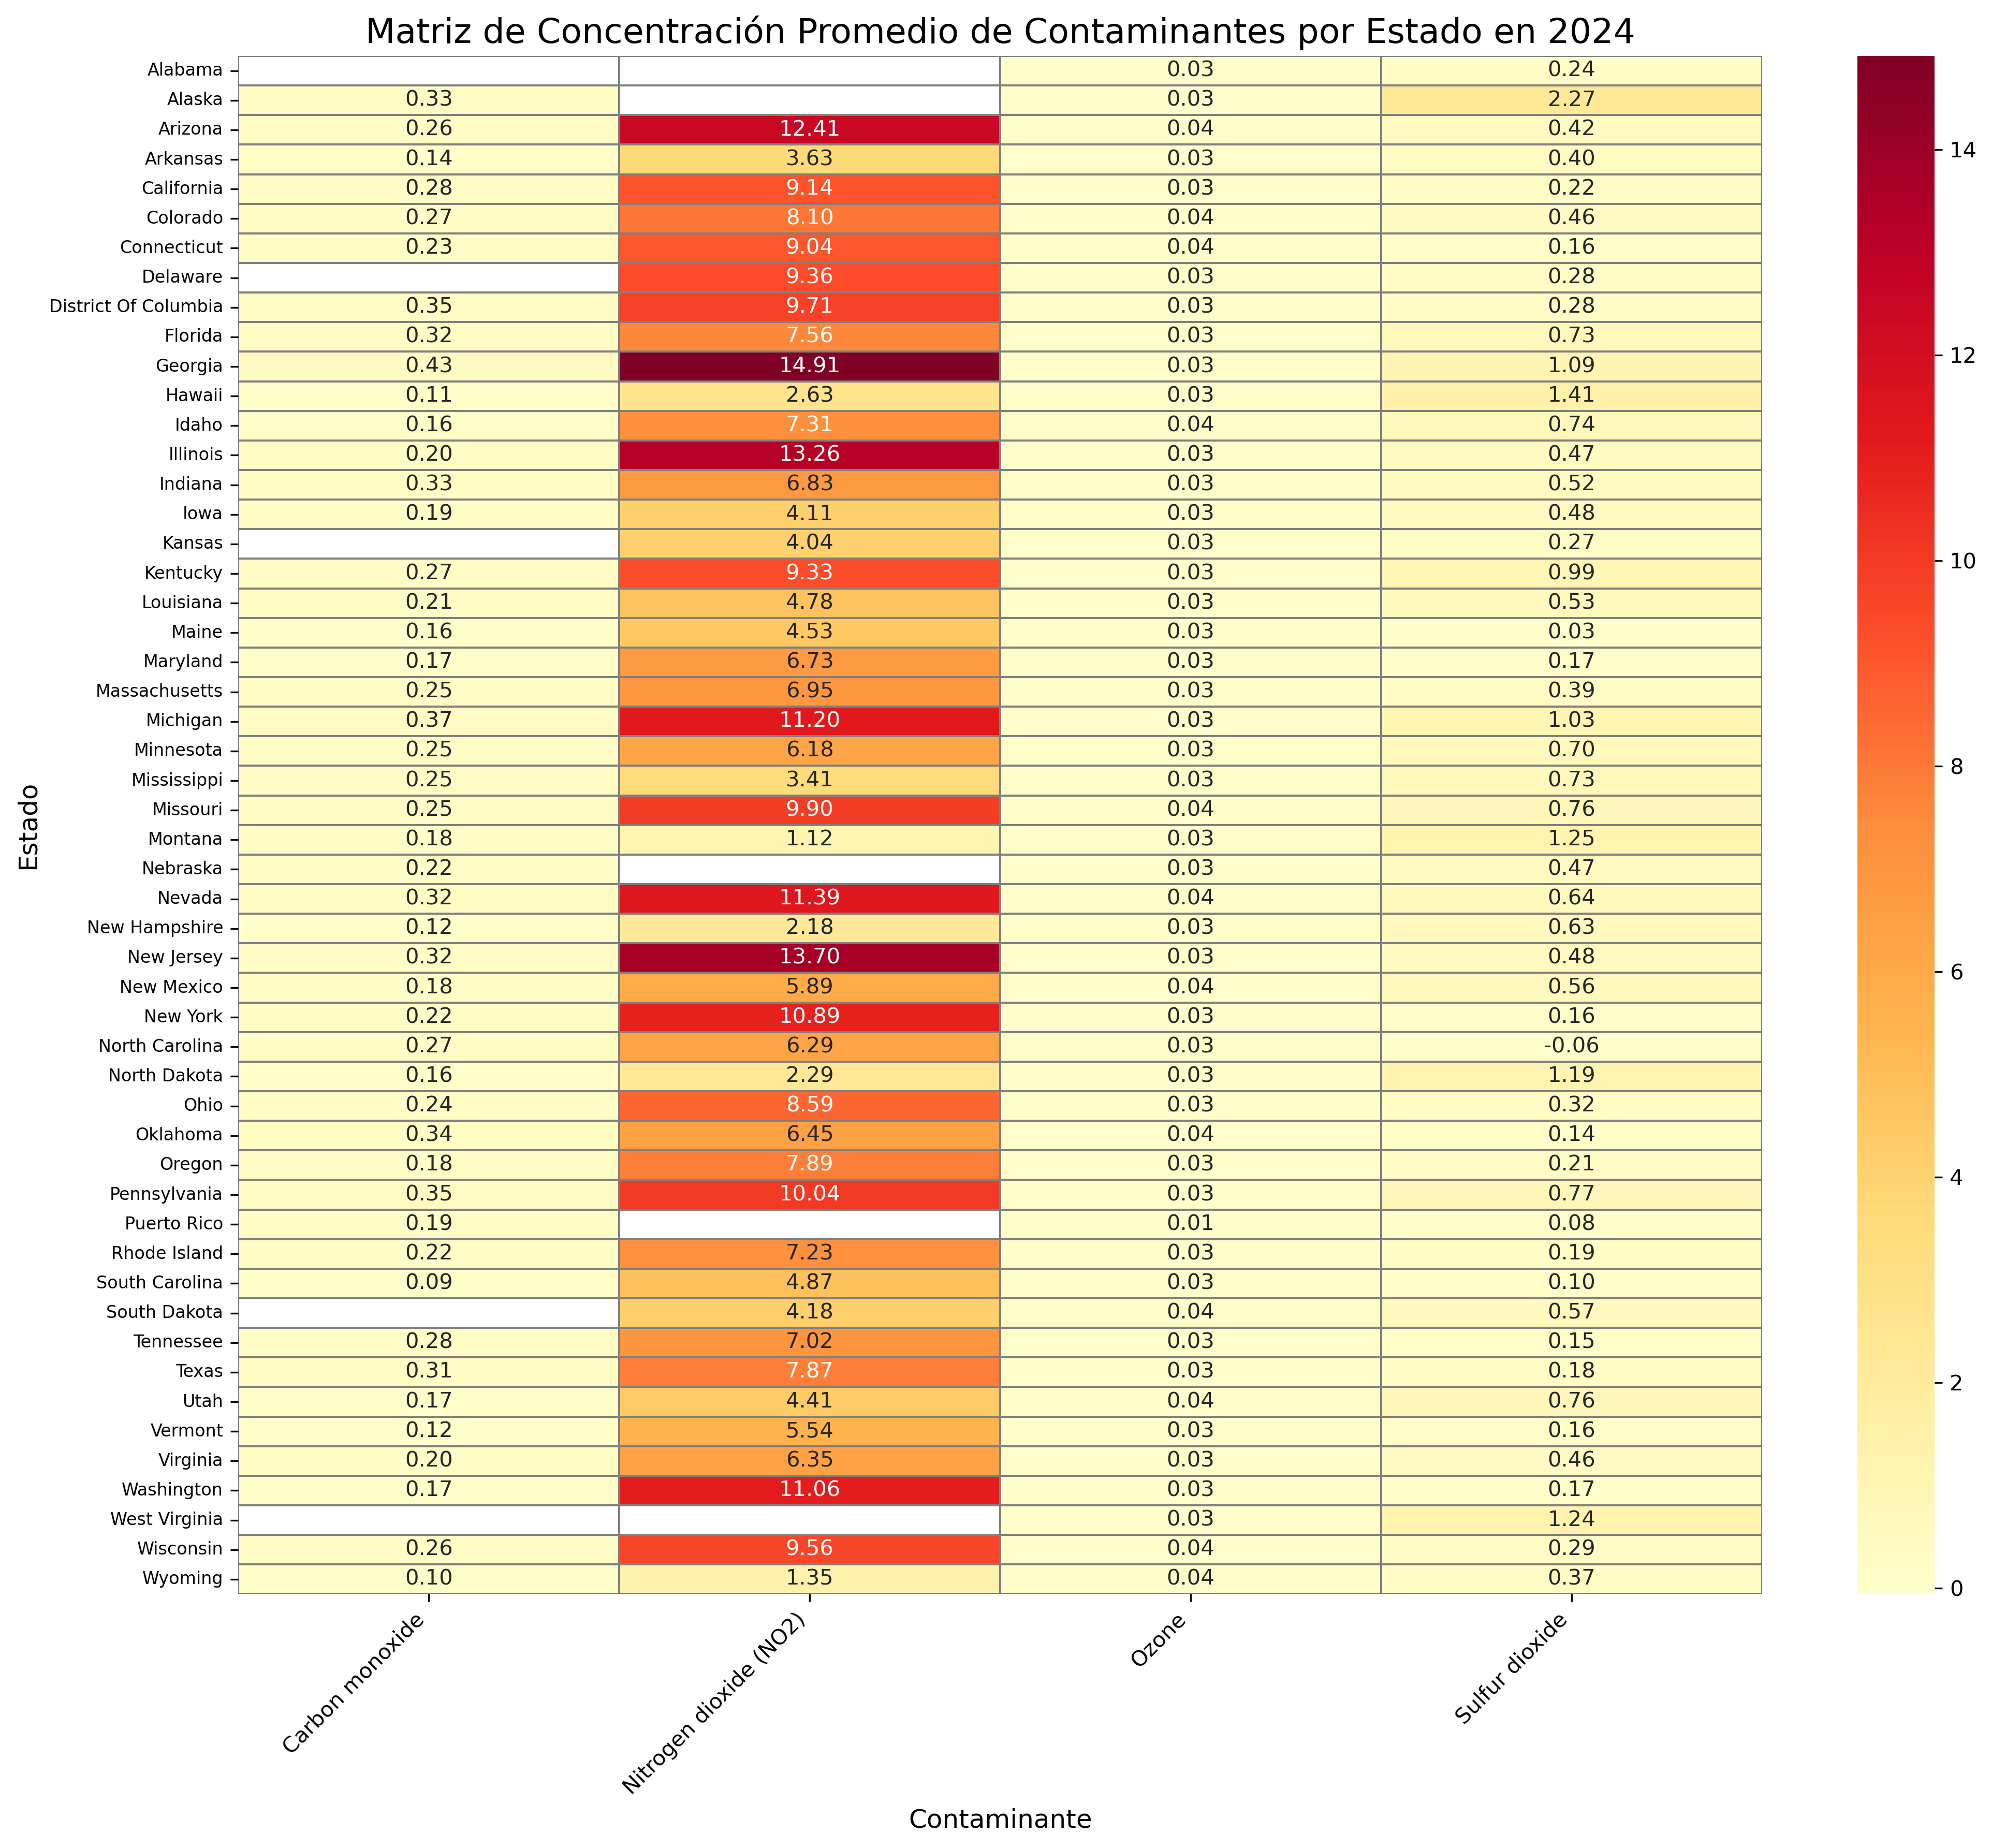

📊 Imagen guardada como 'exportados\heatmap_contaminantes_2024.png'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from db_connection import get_engine  # ✅ Tu módulo centralizado

# --- 1. Establecer conexión ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Consulta SQL para el heatmap ---
query = """
SELECT
    p.parameter_name,
    l.state_name,
    ROUND(AVG(m.value), 2) AS promedio_2024
FROM measurement m
JOIN parameter p ON m.parameter_id = p.parameter_id
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
WHERE p.parameter_code IN ('42101', '42602', '42401', '44201')
  AND YEAR(m.date_local) = 2024
GROUP BY p.parameter_name, l.state_name;
"""

try:
    df = pd.read_sql(query, con=engine)
    print("✅ Consulta ejecutada y datos cargados.")
except Exception as e:
    print(f"❌ Error en la consulta SQL: {e}")
    exit()

# --- 3. Transformar a tabla pivote para heatmap ---
pivot = df.pivot(index="state_name", columns="parameter_name", values="promedio_2024")

# --- 4. Visualización del heatmap ---
plt.figure(figsize=(14, 12), dpi=300)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title("Matriz de Concentración Promedio de Contaminantes por Estado en 2024", fontsize=16)
plt.xlabel("Contaminante", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.tight_layout()

# --- 5. Guardar la imagen en carpeta 'exportados' ---
output_path = os.path.join("exportados", "heatmap_contaminantes_2024.png")
plt.savefig(output_path, dpi=300)
plt.show()

print(f"📊 Imagen guardada como '{output_path}'")


## **✅ Script: Comparativa mensual entre invierno y verano (todos los estados)**

In [10]:
import pandas as pd
from sqlalchemy import text
from db_connection import get_engine  # Tu módulo centralizado
import os

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Consulta SQL: Promedio por estado, contaminante y temporada ---
print("\nEjecutando consulta comparativa invierno vs verano...")

query = """
SELECT
    l.state_name,
    p.parameter_code,
    p.parameter_name,
    CASE
        WHEN MONTH(m.date_local) IN (12, 1, 2) THEN 'Invierno'
        WHEN MONTH(m.date_local) IN (6, 7, 8) THEN 'Verano'
        ELSE NULL
    END AS temporada,
    AVG(m.value) AS promedio_temporada
FROM measurement m
JOIN station s ON m.station_id = s.station_id
JOIN location l ON s.location_id = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE MONTH(m.date_local) IN (1, 2, 6, 7, 8, 12)
  AND p.parameter_code IN ('42101', '42602', '44201', '42401') -- CO, NO2, O3, SO2
GROUP BY l.state_name, p.parameter_code, p.parameter_name, temporada
ORDER BY l.state_name, p.parameter_code, temporada;
"""

try:
    df_comparativa = pd.read_sql(text(query), con=engine)
    print("✅ Consulta ejecutada exitosamente. Vista previa:")
    print(df_comparativa.head())
except Exception as e:
    print(f"❌ Error en la consulta: {e}")
    exit()

# --- 3. Guardar CSV ---
ruta_salida = os.path.join("exportados", "comparativa_invierno_verano.csv")

try:
    df_comparativa.to_csv(ruta_salida, index=False)
    print(f"📁 CSV guardado como: {ruta_salida}")
except Exception as e:
    print(f"❌ Error al guardar CSV: {e}")


Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta comparativa invierno vs verano...
✅ Consulta ejecutada exitosamente. Vista previa:
  state_name  parameter_code          parameter_name temporada  \
0    Alabama           42101         Carbon monoxide  Invierno   
1    Alabama           42101         Carbon monoxide    Verano   
2    Alabama           42401          Sulfur dioxide  Invierno   
3    Alabama           42401          Sulfur dioxide    Verano   
4    Alabama           42602  Nitrogen dioxide (NO2)  Invierno   

   promedio_temporada  
0            0.291285  
1            0.265767  
2            1.253056  
3            1.017421  
4           10.768772  
📁 CSV guardado como: exportados\comparativa_invierno_verano.csv


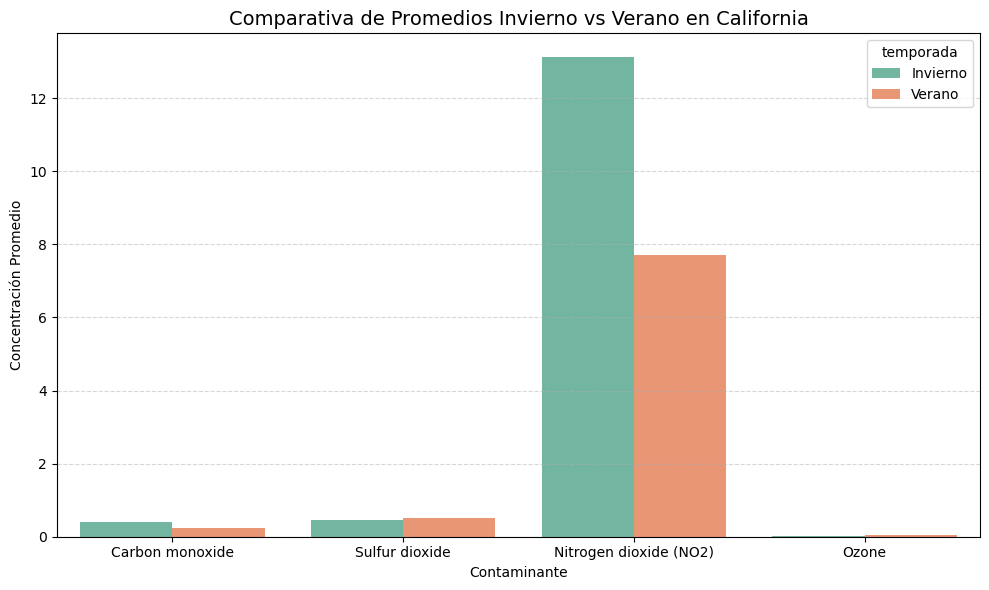

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar datos
df = pd.read_csv("exportados/comparativa_invierno_verano.csv")

# Filtrar un estado específico
estado = "California"
df_estado = df[df['state_name'] == estado]

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=df_estado, x='parameter_name', y='promedio_temporada', hue='temporada', palette='Set2')
plt.title(f'Comparativa de Promedios Invierno vs Verano en {estado}', fontsize=14)
plt.ylabel('Concentración Promedio')
plt.xlabel('Contaminante')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"exportados/comparativa_estacional_{estado.lower()}.png", dpi=300)
plt.show()


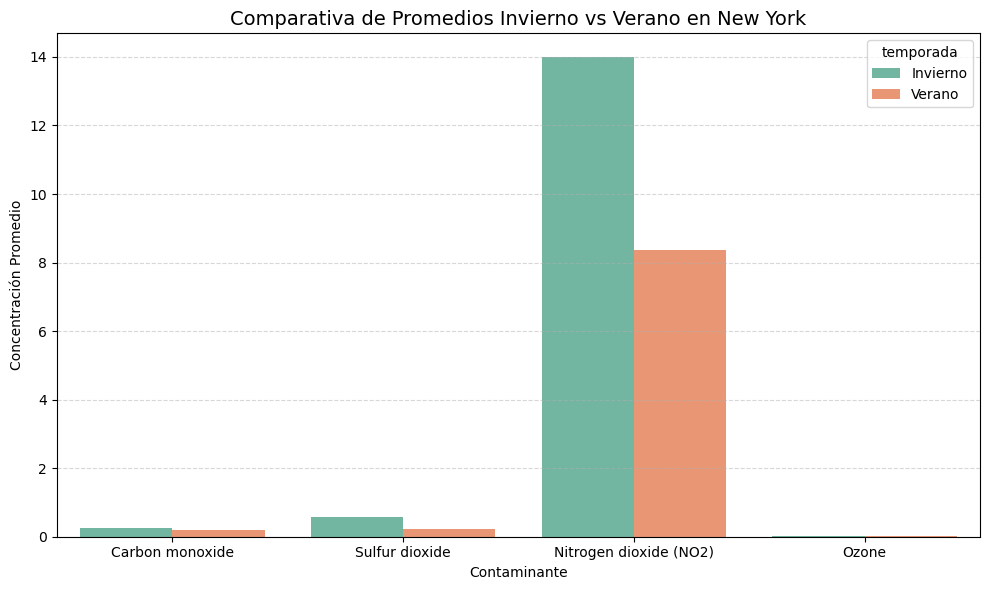

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar datos
df = pd.read_csv("exportados/comparativa_invierno_verano.csv")

# Filtrar un estado específico
estado = "New York"
df_estado = df[df['state_name'] == estado]

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=df_estado, x='parameter_name', y='promedio_temporada', hue='temporada', palette='Set2')
plt.title(f'Comparativa de Promedios Invierno vs Verano en {estado}', fontsize=14)
plt.ylabel('Concentración Promedio')
plt.xlabel('Contaminante')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"exportados/comparativa_estacional_{estado.lower()}.png", dpi=300)
plt.show()


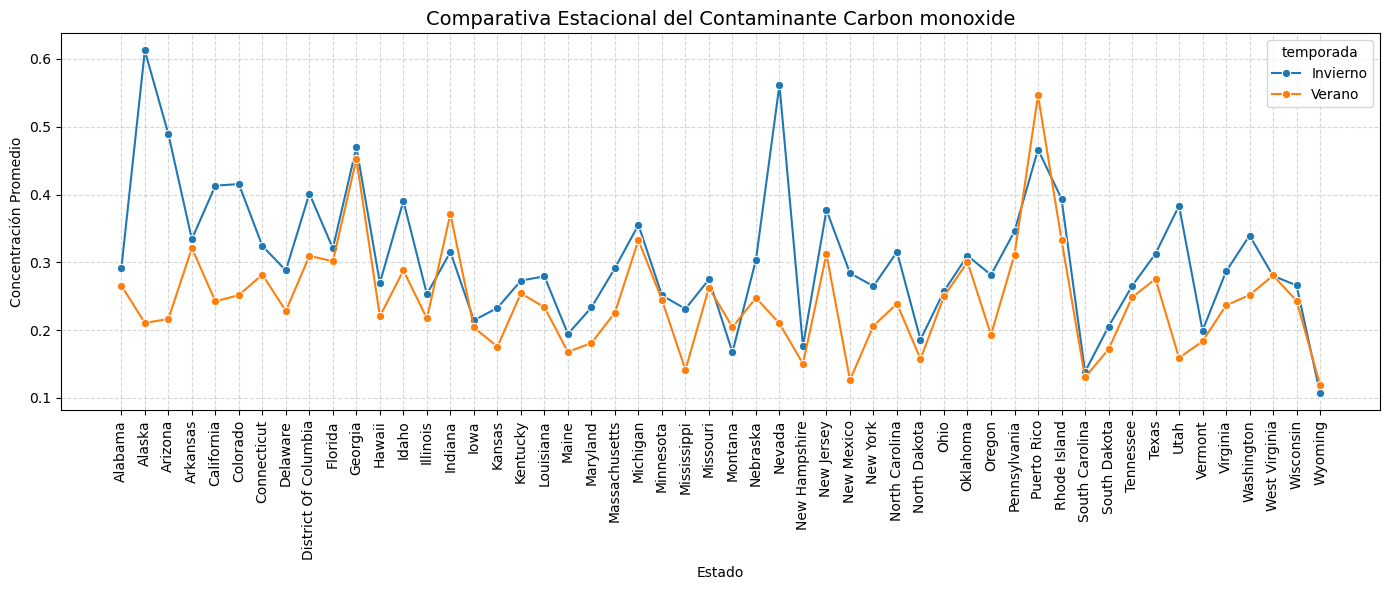

In [14]:
# Filtrar un contaminante específico
contaminante = "Carbon monoxide"
df_cont = df[df['parameter_name'] == contaminante]

# Gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_cont, x='state_name', y='promedio_temporada', hue='temporada', marker='o')
plt.xticks(rotation=90)
plt.title(f'Comparativa Estacional del Contaminante {contaminante}', fontsize=14)
plt.ylabel('Concentración Promedio')
plt.xlabel('Estado')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"exportados/estacional_{contaminante.lower().replace(' ', '_')}.png", dpi=300)
plt.show()


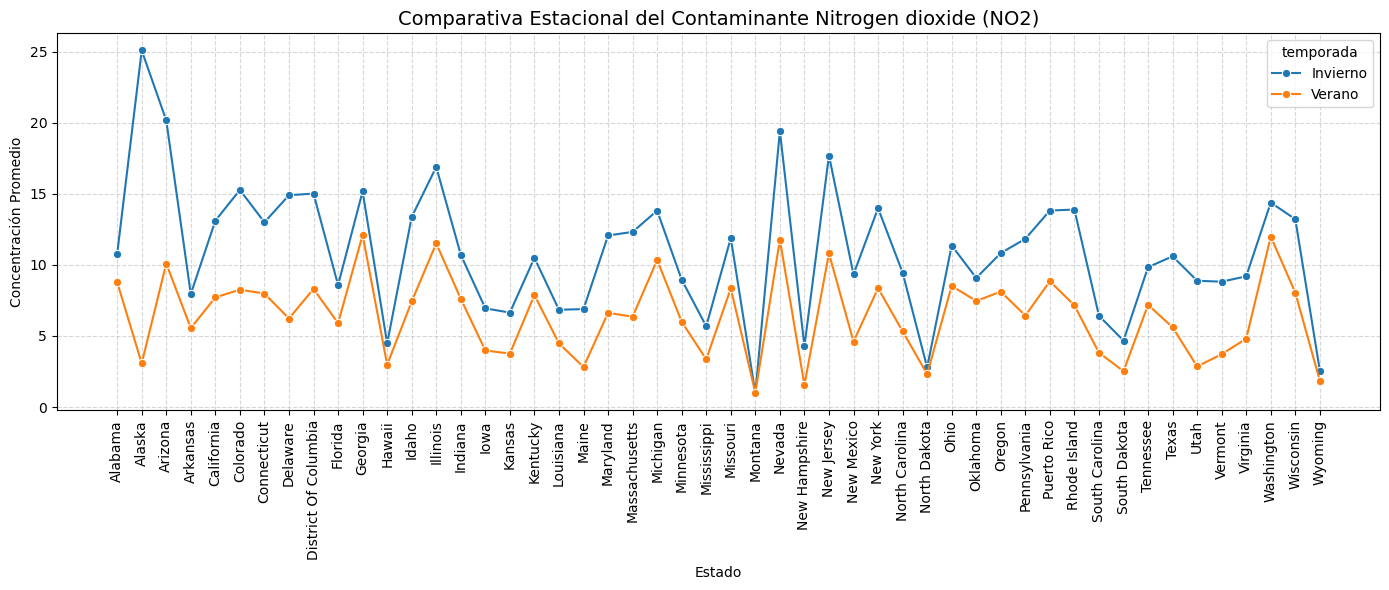

In [15]:
# Filtrar un contaminante específico
contaminante = "Nitrogen dioxide (NO2)"
df_cont = df[df['parameter_name'] == contaminante]

# Gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_cont, x='state_name', y='promedio_temporada', hue='temporada', marker='o')
plt.xticks(rotation=90)
plt.title(f'Comparativa Estacional del Contaminante {contaminante}', fontsize=14)
plt.ylabel('Concentración Promedio')
plt.xlabel('Estado')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"exportados/estacional_{contaminante.lower().replace(' ', '_')}.png", dpi=300)
plt.show()


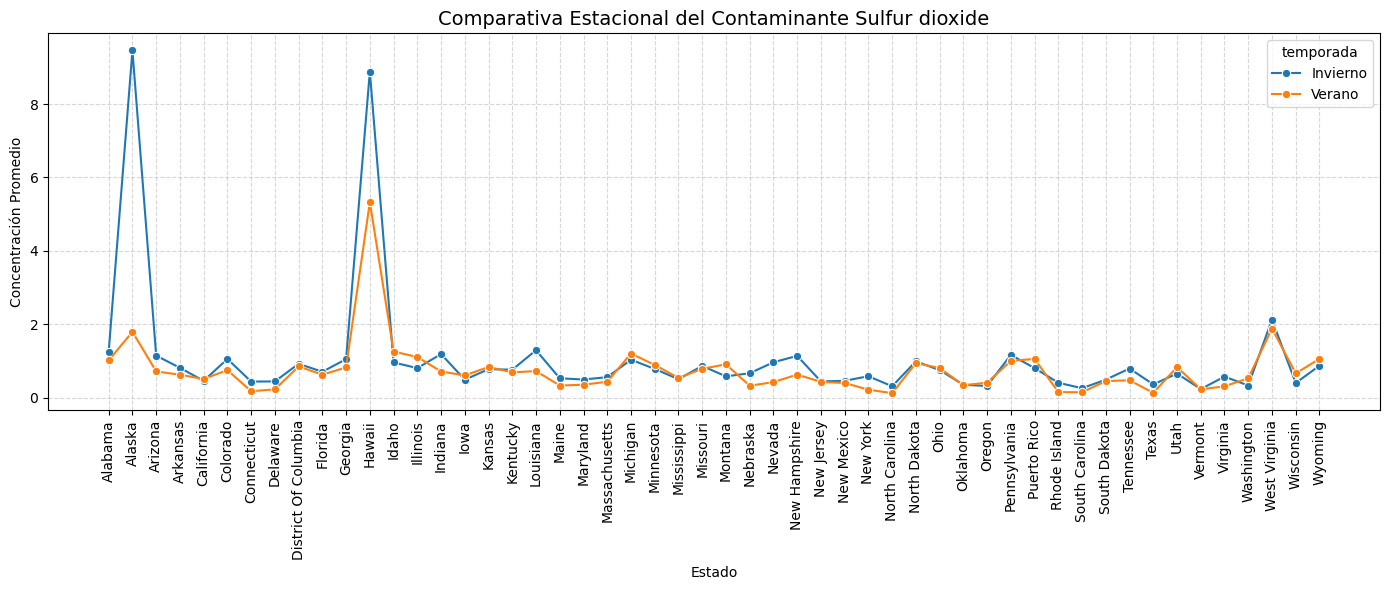

In [16]:
# Filtrar un contaminante específico
contaminante = "Sulfur dioxide"
df_cont = df[df['parameter_name'] == contaminante]

# Gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_cont, x='state_name', y='promedio_temporada', hue='temporada', marker='o')
plt.xticks(rotation=90)
plt.title(f'Comparativa Estacional del Contaminante {contaminante}', fontsize=14)
plt.ylabel('Concentración Promedio')
plt.xlabel('Estado')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"exportados/estacional_{contaminante.lower().replace(' ', '_')}.png", dpi=300)
plt.show()

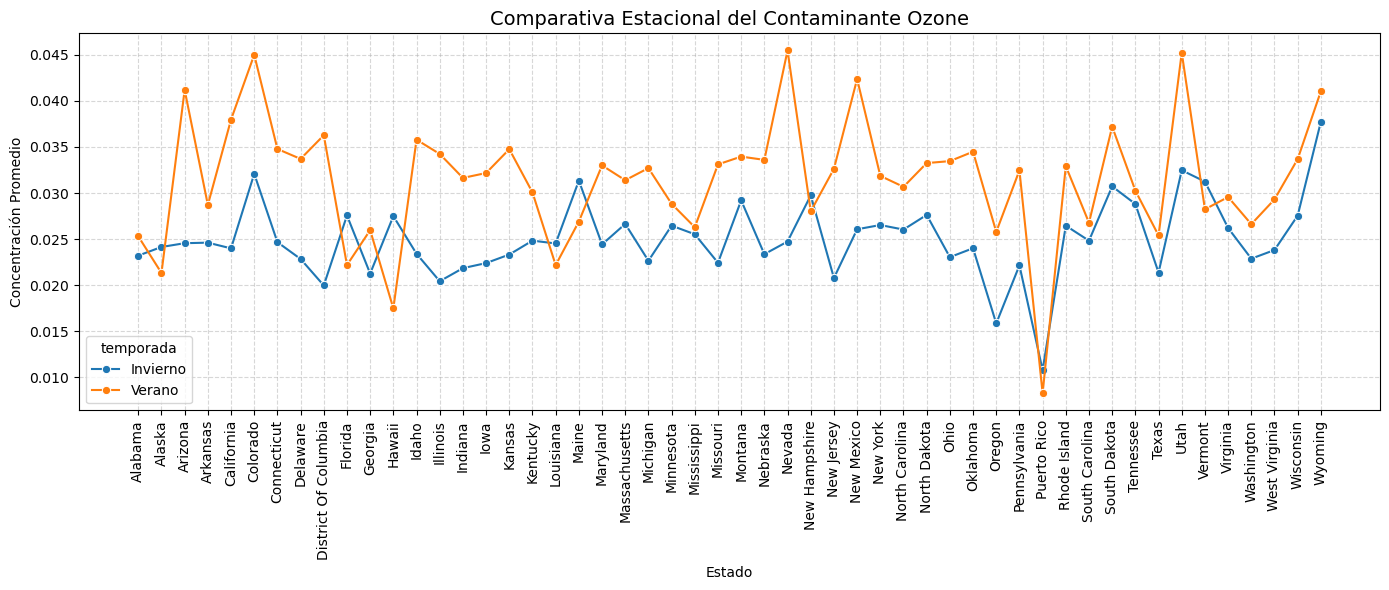

In [17]:
# Filtrar un contaminante específico
contaminante = "Ozone"
df_cont = df[df['parameter_name'] == contaminante]

# Gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_cont, x='state_name', y='promedio_temporada', hue='temporada', marker='o')
plt.xticks(rotation=90)
plt.title(f'Comparativa Estacional del Contaminante {contaminante}', fontsize=14)
plt.ylabel('Concentración Promedio')
plt.xlabel('Estado')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"exportados/estacional_{contaminante.lower().replace(' ', '_')}.png", dpi=300)
plt.show()

In [24]:
 import pandas as pd
import plotly.express as px
import plotly.io as pio
import os
from db_connection import get_engine

# Configurar renderizado interactivo (si estás en Jupyter Notebook)
pio.renderers.default = "iframe_connected"

# --- 1. Conexión a la base de datos ---
print("Estableciendo conexión a la base de datos...")
try:
    engine = get_engine()
    print("✅ Conexión exitosa.")
except Exception as e:
    print(f"❌ Error al conectar: {e}")
    exit()

# --- 2. Consulta SQL: Promedio anual de contaminantes por estado en 2024 ---
print("\nEjecutando consulta SQL...")

query = """
SELECT
    l.state_name,
    p.parameter_name,
    AVG(m.value) AS promedio_estado_2024
FROM measurement m
JOIN station s   ON m.station_id   = s.station_id
JOIN location l  ON s.location_id   = l.location_id
JOIN parameter p ON m.parameter_id = p.parameter_id
WHERE YEAR(m.date_local) = 2024
  AND p.parameter_code IN ('42101','42401','42602','44201')
GROUP BY l.state_name, p.parameter_name;
"""

try:
    df = pd.read_sql(query, con=engine)
    print("✅ Consulta ejecutada. Vista previa:")
    print(df.head())
except Exception as e:
    print(f"❌ Error en la consulta SQL: {e}")
    exit()

# --- 3. Mapear nombres completos a códigos USPS ---
usps = {
 'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
 'Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
 'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA',
 'Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD',
 'Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO',
 'Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ',
 'New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH',
 'Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC',
 'South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT',
 'Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}
df['state_code'] = df['state_name'].map(usps)

# --- 4. Mapa interactivo con Plotly Express ---
print("\nGenerando mapa interactivo...")

fig = px.choropleth(
    df,
    locations='state_code',            # Usamos las abreviaturas USPS
    locationmode='USA-states',
    color='promedio_estado_2024',
    hover_name='state_name',
    hover_data=['parameter_name', 'promedio_estado_2024'],
    animation_frame='parameter_name',  # Slider por contaminante
    color_continuous_scale='YlOrRd',
    scope='usa',
    title='Concentración Promedio por Estado en 2024 (Interactivo)'
)

fig.update_layout(
    margin=dict(l=0, r=0, t=40, b=0),
    geo=dict(showlakes=True, lakecolor='LightBlue')
)

# --- 5. Guardar imagen (último frame mostrado) ---
os.makedirs("exportados", exist_ok=True)
fig.write_image("exportados/mapa_concentracion_estados_2024.png", width=1000, height=600, scale=1)
print("🖼️ Imagen guardada como 'exportados/mapa_concentracion_estados_2024.png'")

# --- 6. Mostrar el mapa interactivo ---
fig.show()


Estableciendo conexión a la base de datos...
✅ Conexión exitosa.

Ejecutando consulta SQL...
✅ Consulta ejecutada. Vista previa:
  state_name   parameter_name  promedio_estado_2024
0    Alabama            Ozone              0.029716
1    Alabama   Sulfur dioxide              0.243575
2     Alaska  Carbon monoxide              0.331027
3     Alaska            Ozone              0.028400
4     Alaska   Sulfur dioxide              2.272766

Generando mapa interactivo...
🖼️ Imagen guardada como 'exportados/mapa_concentracion_estados_2024.png'


In [22]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import os
from db_connection import get_engine

pio.renderers.default = "notebook"  # o "iframe_connected" en JupyterLab

# 1) Conexión y consulta
engine = get_engine()
query = """
SELECT
    l.state_name,
    p.parameter_name,
    CASE
        WHEN MONTH(m.date_local) IN (12,1,2) THEN 'Invierno'
        WHEN MONTH(m.date_local) IN (6,7,8) THEN 'Verano'
    END AS temporada,
    AVG(m.value) AS promedio_temporada
FROM measurement m
JOIN parameter p ON m.parameter_id = p.parameter_id
JOIN station s   ON m.station_id   = s.station_id
JOIN location l  ON s.location_id   = l.location_id
WHERE p.parameter_code IN ('42101','42401','42602','44201')
  AND YEAR(m.date_local)=2024
  AND MONTH(m.date_local) IN (12,1,2,6,7,8)
GROUP BY l.state_name,p.parameter_name,temporada;
"""
df = pd.read_sql(query, engine)

# 2) Mapeo nombres completos → abreviatura USPS
usps = {
 'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
 'Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
 'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA',
 'Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD',
 'Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO',
 'Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ',
 'New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH',
 'Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC',
 'South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT',
 'Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}
df['state_code'] = df['state_name'].map(usps)

# 3) Rango dinámico por contaminante
ranges = {}
for c in df['parameter_name'].unique():
    sub = df[df['parameter_name']==c]['promedio_temporada']
    ranges[c] = (sub.min(), sub.max())

# 4) Construir figura con una traza por contaminante y temporada
fig = go.Figure()
colors = {
    "Ozone": "Reds",
    "Sulfur dioxide": "Blues",
    "Carbon monoxide": "Oranges",
    "Nitrogen dioxide (NO2)": "Greens"
}

for contaminant in df['parameter_name'].unique():
    zmin, zmax = ranges[contaminant]
    for season in ['Invierno','Verano']:
        d = df[(df['parameter_name']==contaminant)&(df['temporada']==season)]
        fig.add_trace(go.Choropleth(
            locations=d['state_code'],           # <— aquí usamos USPS code
            locationmode='USA-states',
            z=d['promedio_temporada'],
            colorscale=colors[contaminant],
            zmin=zmin, zmax=zmax,
            colorbar_title="Promedio",
            name=f"{contaminant} – {season}",
            visible=False,
            hovertemplate="<b>%{location}</b><br>%{z:.2f}<extra></extra>"
        ))
# activar la primera traza
fig.data[0].visible = True

# 5) Dropdown para seleccionar contaminante/temporada
buttons, i = [], 0
total = len(df['parameter_name'].unique()) * 2
for contaminant in df['parameter_name'].unique():
    for season in ['Invierno','Verano']:
        vis = [False]*total
        vis[i] = True
        buttons.append(dict(
            label=f"{contaminant} – {season}",
            method="update",
            args=[{"visible": vis},
                  {"title":f"Concentración de {contaminant} ({season} 2024)"}]
        ))
        i += 1

fig.update_layout(
    title="Contaminación Estacional por Estado (USA 2024)",
    geo=dict(scope="usa", projection=dict(type="albers usa"), showlakes=True, lakecolor="lightblue"),
    updatemenus=[dict(active=0, buttons=buttons, x=0, y=1.1, xanchor='left', yanchor='top')],
    margin=dict(l=0, r=0, t=50, b=0)
)

# 6) Mostrar y guardar
fig.show()
os.makedirs("exportados", exist_ok=True)
fig.write_image("exportados/mapa_estacional_dynamic_fixed.png", width=1100, height=700, scale=2)
print("✅ Imagen guardada en exportados/mapa_estacional_dynamic_fixed.png")


✅ Imagen guardada en exportados/mapa_estacional_dynamic_fixed.png


In [25]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# --- 1. Cargar datos ---------------------------------------
# Ajusta la ruta si lo necesitas:
df = pd.read_csv("promedios_anuales_estatales.csv")

# --- 2. Filtrar año 2024 ----------------------------------
df_2024 = df[df['anio'] == 2024]

# --- 3. Gráfico de barras facetadas -----------------------
fig_bar = px.bar(
    df_2024,
    x='state_name',
    y='promedio_anual_estado',
    facet_col='parameter_name',
    facet_col_wrap=2,
    labels={'state_name':'Estado', 'promedio_anual_estado':'Promedio Anual'},
    title='Comparativa de Contaminantes por Estado en 2024',
    height=600, width=1000
)
# Quitar leyenda redundante y limpiar títulos de facetas
fig_bar.update_layout(showlegend=False, margin=dict(t=50, b=50))
fig_bar.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig_bar.show()

# --- 4. Radar chart por estado -----------------------------
estado = "California"   # Cámbialo aquí al estado que quieras

df_state = df_2024[df_2024['state_name'] == estado]
contaminantes = df_state['parameter_name'].tolist()
valores        = df_state['promedio_anual_estado'].tolist()

# Cierra el ciclo para el radar
contaminantes += contaminantes[:1]
valores       += valores[:1]

fig_radar = go.Figure(
    go.Scatterpolar(
        r=valores,
        theta=contaminantes,
        fill='toself',
        name=estado
    )
)
fig_radar.update_layout(
    title=f'Perfil de Contaminantes en {estado} (2024)',
    polar=dict(
        radialaxis=dict(visible=True, tickformat='.2f')
    ),
    showlegend=False
)
fig_radar.show()


In [29]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

# Asegúrate de que la carpeta exista
os.makedirs("exportados", exist_ok=True)

# 1. Carga de datos
df = pd.read_csv("promedios_anuales_estatales.csv")  # Ajusta la ruta si es necesario
df_2024 = df[df["anio"] == 2024]

# 2. Gráfico de barras facetadas
fig_bar = px.bar(
    df_2024,
    x="state_name",
    y="promedio_anual_estado",
    facet_col="parameter_name",
    facet_col_wrap=2,
    labels={"state_name":"Estado", "promedio_anual_estado":"Promedio Anual"},
    title="Comparativa de Contaminantes por Estado en 2024",
    height=600, width=1000
)
fig_bar.update_layout(showlegend=False, margin=dict(t=50, b=50))
fig_bar.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Mostrar y guardar el gráfico de barras
fig_bar.show()
fig_bar.write_image("exportados/comparativa_contaminantes_2024_bar.png", width=1000, height=600, scale=2)
print("🖼️ Gráfico de barras guardado en: exportados/comparativa_contaminantes_2024_bar.png")

# 3. Radar chart para un estado concreto
estado = "California"   # Cámbialo al estado que prefieras
df_state = df_2024[df_2024["state_name"] == estado]

conts  = df_state["parameter_name"].tolist()
values = df_state["promedio_anual_estado"].tolist()
# Cierra el ciclo
conts.append(conts[0])
values.append(values[0])

fig_radar = go.Figure(
    go.Scatterpolar(
        r=values,
        theta=conts,
        fill="toself",
        name=estado
    )
)
fig_radar.update_layout(
    title=f"Perfil de Contaminantes en {estado} (2024)",
    polar=dict(radialaxis=dict(visible=True, tickformat=".2f")),
    showlegend=False,
    width=700, height=700
)

# Mostrar y guardar el radar chart
fig_radar.show()
fig_radar.write_image(f"exportados/radar_contaminantes_{estado.lower()}.png", scale=2)
print(f"🖼️ Radar chart guardado en: exportados/radar_contaminantes_{estado.lower()}.png")


🖼️ Gráfico de barras guardado en: exportados/comparativa_contaminantes_2024_bar.png


🖼️ Radar chart guardado en: exportados/radar_contaminantes_california.png
